For this assignment, we will work towards answering the following question: "Is there a positive correlation between Stephen Curry's prolific 3-point shooting and the number of 3-point attempts the league took as a whole?" In order to do so, we will need some useful data.

First, let us import some useful packages.

In [95]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [96]:
# Import relevant libraries and packages.
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns # For all our visualization needs.
import statsmodels.api as sm # What does this do? Find out and type here.
from statsmodels.graphics.api import abline_plot # What does this do? Find out and type here.
from sklearn.metrics import mean_squared_error, r2_score # What does this do? Find out and type here.
from sklearn.metrics import mean_absolute_percentage_error
from sklearn.model_selection import train_test_split #  What does this do? Find out and type here.
from sklearn import linear_model, preprocessing # What does this do? Find out and type here.
import warnings # For handling error messages.
# Don't worry about the following two instructions: they just suppress warnings that could occur later. 
warnings.simplefilter(action="ignore", category=FutureWarning)
warnings.filterwarnings(action="ignore", module="scipy", message="^internal gelsd")

Next, let's import the following data and convert it into a dataframe.

In [97]:
d = pd.read_excel('C:\\Users\\19713\\Desktop\\Springboard\\NBA 3-Point Shooting Data (1996-2020).xlsx', index_col=0)
df = pd.DataFrame(d)

Let's take a look at what the data looks like:

In [98]:
df

,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10,...,Unnamed: 88,Unnamed: 89,Unnamed: 90,Unnamed: 91,Unnamed: 92,Unnamed: 93,Unnamed: 94,Unnamed: 95,Unnamed: 96,Unnamed: 97
NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
NaN,Yearwise Data,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
NaN,TEAMS,1996-97,NaN,NaN,NaN,1997-98,NaN,NaN,NaN,1998-99,...,NaN,NaN,2018-19,NaN,NaN,NaN,2019-20,NaN,NaN,NaN
NaN,NaN,3PM,3PA,3P%,3P% share in Total Points,3PM,3PA,3P%,3P% share in Total Points,3PM,...,3P%,3P% share in Total Points,3PM,3PA,3P%,3P% share in Total Points,3PM,3PA,3P%,3P% share in Total Points
NaN,Atlanta Hawks,8,22.4,36,25.32,4.1,12.4,33.2,12.83,3.9,...,36,32.5,13,37,35.2,34.4,12,36.1,33.3,32.2
NaN,Boston Celtics,5.7,16.2,35.1,16.99,5.1,15.2,33.2,15.96,5.5,...,37.7,33.2,12.6,34.5,36.5,33.6,12.6,34.5,36.4,33.2
NaN,Brooklyn Nets,5.9,16.7,35.3,18.21,3.8,11.4,33.1,11.45,4.5,...,35.7,21.9,10.1,28.7,35.1,26.9,13.3,39.7,33.6,35.2
NaN,Chicago Bulls,6.4,17.1,37.3,18.63,3.8,11.7,32.3,11.79,3.5,...,36.9,27.7,11.9,33.9,35.1,32.2,12.1,34.3,35.2,35.3
NaN,Cleveland Cavaliers,5.9,15.7,37.6,20.23,3.6,9.8,37.2,11.67,3.6,...,35.5,32.1,9.1,25.9,35.1,26,12.2,35.1,34.8,34.3


Let us also take a closer look as to what this table is about:

In [99]:
df.iloc[4,:].unique()

array([nan, '3PM', '3PA', '3P%', '3P% share in Total Points'],
      dtype=object)

In [100]:
df.iloc[3,:].unique()

array(['TEAMS', '1996-97', nan, '1997-98', '1998-99', '1999-00',
       '2000-01', '2001-02', '2002-03', '2003-04', '2004-05', '2005-06',
       '2006-07', '2007-08', '2008-09', '2009-10', '2010-11', '2011-12',
       '2012-13', '2013-14', '2014-15', '2015-16', '2016-17', '2017-18',
       '2018-19', '2019-20'], dtype=object)

From the information here, we can tell that the table consists of statistics on the number of 3-pointers made, number of 3-point attempts, 3-point percentage, and 3P% share in total points for all NBA teams from the 1996-97 season to the 2019-2020 season.

A few things of concern here: it seems as though the first three rows do not contain much information and are instead mostly full of NaN values. Let's take a closer look at these rows.

In [101]:
df.iloc[0,:].unique()

array([nan], dtype=object)

In [102]:
df.iloc[1,:].unique()

array(['Yearwise Data', nan], dtype=object)

In [103]:
df.iloc[2,:].unique()

array([nan], dtype=object)

The first three rows are unessential. Let's go ahead and get rid of these rows.

In [104]:
df = df.tail(df.shape[0]-3)

In [105]:
df.head()

,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10,...,Unnamed: 88,Unnamed: 89,Unnamed: 90,Unnamed: 91,Unnamed: 92,Unnamed: 93,Unnamed: 94,Unnamed: 95,Unnamed: 96,Unnamed: 97
NaN,TEAMS,1996-97,NaN,NaN,NaN,1997-98,NaN,NaN,NaN,1998-99,...,NaN,NaN,2018-19,NaN,NaN,NaN,2019-20,NaN,NaN,NaN
NaN,NaN,3PM,3PA,3P%,3P% share in Total Points,3PM,3PA,3P%,3P% share in Total Points,3PM,...,3P%,3P% share in Total Points,3PM,3PA,3P%,3P% share in Total Points,3PM,3PA,3P%,3P% share in Total Points
NaN,Atlanta Hawks,8,22.4,36,25.32,4.1,12.4,33.2,12.83,3.9,...,36,32.5,13,37,35.2,34.4,12,36.1,33.3,32.2
NaN,Boston Celtics,5.7,16.2,35.1,16.99,5.1,15.2,33.2,15.96,5.5,...,37.7,33.2,12.6,34.5,36.5,33.6,12.6,34.5,36.4,33.2
NaN,Brooklyn Nets,5.9,16.7,35.3,18.21,3.8,11.4,33.1,11.45,4.5,...,35.7,21.9,10.1,28.7,35.1,26.9,13.3,39.7,33.6,35.2


So far so good. However, the index and the column values are not ideal. Let's first reset the index.

In [106]:
df.reset_index(drop=True, inplace=True)
df.head()

,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10,...,Unnamed: 88,Unnamed: 89,Unnamed: 90,Unnamed: 91,Unnamed: 92,Unnamed: 93,Unnamed: 94,Unnamed: 95,Unnamed: 96,Unnamed: 97
0,TEAMS,1996-97,NaN,NaN,NaN,1997-98,NaN,NaN,NaN,1998-99,...,NaN,NaN,2018-19,NaN,NaN,NaN,2019-20,NaN,NaN,NaN
1,NaN,3PM,3PA,3P%,3P% share in Total Points,3PM,3PA,3P%,3P% share in Total Points,3PM,...,3P%,3P% share in Total Points,3PM,3PA,3P%,3P% share in Total Points,3PM,3PA,3P%,3P% share in Total Points
2,Atlanta Hawks,8,22.4,36,25.32,4.1,12.4,33.2,12.83,3.9,...,36,32.5,13,37,35.2,34.4,12,36.1,33.3,32.2
3,Boston Celtics,5.7,16.2,35.1,16.99,5.1,15.2,33.2,15.96,5.5,...,37.7,33.2,12.6,34.5,36.5,33.6,12.6,34.5,36.4,33.2
4,Brooklyn Nets,5.9,16.7,35.3,18.21,3.8,11.4,33.1,11.45,4.5,...,35.7,21.9,10.1,28.7,35.1,26.9,13.3,39.7,33.6,35.2


And now for the columns. 

In [107]:
df = df.set_axis(range(df.shape[1]), axis=1)
df.head()

,0,1,2,3,4,5,6,7,8,9,...,87,88,89,90,91,92,93,94,95,96
0,TEAMS,1996-97,NaN,NaN,NaN,1997-98,NaN,NaN,NaN,1998-99,...,NaN,NaN,2018-19,NaN,NaN,NaN,2019-20,NaN,NaN,NaN
1,NaN,3PM,3PA,3P%,3P% share in Total Points,3PM,3PA,3P%,3P% share in Total Points,3PM,...,3P%,3P% share in Total Points,3PM,3PA,3P%,3P% share in Total Points,3PM,3PA,3P%,3P% share in Total Points
2,Atlanta Hawks,8,22.4,36,25.32,4.1,12.4,33.2,12.83,3.9,...,36,32.5,13,37,35.2,34.4,12,36.1,33.3,32.2
3,Boston Celtics,5.7,16.2,35.1,16.99,5.1,15.2,33.2,15.96,5.5,...,37.7,33.2,12.6,34.5,36.5,33.6,12.6,34.5,36.4,33.2
4,Brooklyn Nets,5.9,16.7,35.3,18.21,3.8,11.4,33.1,11.45,4.5,...,35.7,21.9,10.1,28.7,35.1,26.9,13.3,39.7,33.6,35.2


So far so good. I also notice that row 32 might only be full of NaN values. Let's see if that's true.

In [108]:
df.iloc[32,:].unique()

array([nan], dtype=object)

Let's get rid of this row and reset the index.

In [109]:
df.drop(32, inplace = True)
df.reset_index(drop=True, inplace=True)

In [110]:
df

,0,1,2,3,4,5,6,7,8,9,...,87,88,89,90,91,92,93,94,95,96
0,TEAMS,1996-97,NaN,NaN,NaN,1997-98,NaN,NaN,NaN,1998-99,...,NaN,NaN,2018-19,NaN,NaN,NaN,2019-20,NaN,NaN,NaN
1,NaN,3PM,3PA,3P%,3P% share in Total Points,3PM,3PA,3P%,3P% share in Total Points,3PM,...,3P%,3P% share in Total Points,3PM,3PA,3P%,3P% share in Total Points,3PM,3PA,3P%,3P% share in Total Points
2,Atlanta Hawks,8,22.4,36,25.32,4.1,12.4,33.2,12.83,3.9,...,36,32.5,13,37,35.2,34.4,12,36.1,33.3,32.2
3,Boston Celtics,5.7,16.2,35.1,16.99,5.1,15.2,33.2,15.96,5.5,...,37.7,33.2,12.6,34.5,36.5,33.6,12.6,34.5,36.4,33.2
4,Brooklyn Nets,5.9,16.7,35.3,18.21,3.8,11.4,33.1,11.45,4.5,...,35.7,21.9,10.1,28.7,35.1,26.9,13.3,39.7,33.6,35.2
5,Chicago Bulls,6.4,17.1,37.3,18.63,3.8,11.7,32.3,11.79,3.5,...,36.9,27.7,11.9,33.9,35.1,32.2,12.1,34.3,35.2,35.3
6,Cleveland Cavaliers,5.9,15.7,37.6,20.23,3.6,9.8,37.2,11.67,3.6,...,35.5,32.1,9.1,25.9,35.1,26,12.2,35.1,34.8,34.3
7,Dallas Mavericks,5.2,16,32.6,17.22,5.1,14.4,35.7,16.74,4,...,37.2,32.5,10.3,29.1,35.5,29.6,11.2,31.8,35.1,31.4
8,Denver Nuggets,7.8,20.9,37.2,23.93,3.5,10.9,32.3,11.79,6,...,36,34.6,12.5,36.6,34,34.4,15.1,41.3,36.7,38.7
9,Detroit Pistons,7.1,18.3,38.8,22.62,3.6,11.4,31.2,11.47,5,...,37.1,31.4,11,31.4,35.1,29.8,11,30.6,35.9,29.6


Great! So far it looks pretty good. Why don't we take a look at what the names of the teams are.

In [111]:
df.iloc[:,0]

0                      TEAMS
1                        NaN
2              Atlanta Hawks
3             Boston Celtics
4              Brooklyn Nets
5              Chicago Bulls
6        Cleveland Cavaliers
7           Dallas Mavericks
8             Denver Nuggets
9            Detroit Pistons
10     Golden State Warriors
11           Houston Rockets
12            Indiana Pacers
13      Los Angeles Clippers
14        Los Angeles Lakers
15         Memphis Grizzlies
16                Miami Heat
17           Milwaukee Bucks
18    Minnesota Timberwolves
19           New York Knicks
20    Oklahoma City Thunders
21             Orlando Magic
22        Philadelphia 76ers
23              Phoenix Suns
24    Portland Trail Blazers
25          Sacramento Kings
26         San Antonio Spurs
27           Toronto Raptors
28                 Utah Jazz
29        Washington Wizards
30        Charolette Hornets
31      New Orleans Pelicans
32              NBA(Average)
Name: 0, dtype: object

Taking a look at these teams, there are two teams that are misspelled: the "Oklahoma City Thunders" and the "Charolette Hornets." Let's correct these misspellings. 

In [112]:
df.iloc[20,0] = 'Oklahoma City Thunder'
df.iloc[30,0] = 'Charlotte Hornets'
df.iloc[[20,30],0]

20    Oklahoma City Thunder
30        Charlotte Hornets
Name: 0, dtype: object

Awesome! Let us now load our next table.

In [113]:
stephen_curry = pd.read_csv('C:\\Users\\19713\\Desktop\\Springboard\\Stephen Curry Stats.csv')
stephen_curry

,Season_year,Season_div,Date,OPP,Result,T Score,O Score,MIN,FG,FGM,...,FTM,FTA,FT%,REB,AST,BLK,STL,PF,TO,PTS
0,2009-2010,Regular,Wed 4/14,POR,W,122,116,48.0,13-25,13,...,12,12,100.0,9,8,1,2,0,2,42
1,2009-2010,Regular,Tue 4/13,UTA,L,94,103,41.0,5-15,5,...,6,6,100.0,5,6,0,2,4,2,17
2,2009-2010,Regular,Sun 4/11,OKC,W,120,117,35.0,9-16,9,...,4,6,66.7,7,7,0,1,2,5,25
3,2009-2010,Regular,Sat 4/10,LAC,L,104,107,41.0,10-19,10,...,4,4,100.0,9,4,0,3,5,3,29
4,2009-2010,Regular,Wed 4/7,MIN,W,116,107,44.0,12-22,12,...,0,0,0.0,8,14,0,7,4,4,27
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
916,2020-2021,Regular,Fri 5/21,MEM,L,112,117,47.0,13-28,13,...,7,7,100.0,4,5,0,3,5,7,39
917,2020-2021,Regular,Wed 5/19,LAL,L,100,103,41.0,12-23,12,...,7,8,87.5,7,3,0,0,2,6,37
918,2020-2021,Regular,Thu 12/17,SAC,W,113,105,29.0,9-23,9,...,5,5,100.0,6,3,0,2,2,1,29
919,2020-2021,Regular,Tue 12/15,SAC,L,113,114,28.0,11-21,11,...,2,3,66.7,4,4,1,3,0,4,29


For what seasons do we have data for Stephen Curry's career? 

In [114]:
stephen_curry['Season_year'].unique()

array(['2009-2010', '2010-2011', '2011-2012', '2012-2013', '2013-2014',
       '2014-2015', '2015-2016', '2016-2017', '2017-2018', '2018-2019',
       '2019-2020', '2020-2021'], dtype=object)

What about for the first table?

In [115]:
df.iloc[0,:].unique()

array(['TEAMS', '1996-97', nan, '1997-98', '1998-99', '1999-00',
       '2000-01', '2001-02', '2002-03', '2003-04', '2004-05', '2005-06',
       '2006-07', '2007-08', '2008-09', '2009-10', '2010-11', '2011-12',
       '2012-13', '2013-14', '2014-15', '2015-16', '2016-17', '2017-18',
       '2018-19', '2019-20'], dtype=object)

Since the latest season we have data on for this table is the 2019-2020 season and the latest season we have data on for Stephen Curry is the 2020-2021 season, let's ignore all the games which took place in the 2020-2021 season for Stephen Curry. In order to do that, we first will need a list of the index values for the rows which correspond to the 2020-2021 season.

In [116]:
stephen_curry_season_year = pd.DataFrame(stephen_curry['Season_year']) 
list(stephen_curry_season_year.loc[stephen_curry_season_year['Season_year'] == '2020-2021'].index)

[853,
 854,
 855,
 856,
 857,
 858,
 859,
 860,
 861,
 862,
 863,
 864,
 865,
 866,
 867,
 868,
 869,
 870,
 871,
 872,
 873,
 874,
 875,
 876,
 877,
 878,
 879,
 880,
 881,
 882,
 883,
 884,
 885,
 886,
 887,
 888,
 889,
 890,
 891,
 892,
 893,
 894,
 895,
 896,
 897,
 898,
 899,
 900,
 901,
 902,
 903,
 904,
 905,
 906,
 907,
 908,
 909,
 910,
 911,
 912,
 913,
 914,
 915,
 916,
 917,
 918,
 919,
 920]

Let's now drop these rows from the stephen_curry dataframe.

In [117]:
stephen_curry.drop(list(stephen_curry_season_year.loc[stephen_curry_season_year['Season_year'] == '2020-2021'].index), inplace = True)
stephen_curry

,Season_year,Season_div,Date,OPP,Result,T Score,O Score,MIN,FG,FGM,...,FTM,FTA,FT%,REB,AST,BLK,STL,PF,TO,PTS
0,2009-2010,Regular,Wed 4/14,POR,W,122,116,48.0,13-25,13,...,12,12,100.0,9,8,1,2,0,2,42
1,2009-2010,Regular,Tue 4/13,UTA,L,94,103,41.0,5-15,5,...,6,6,100.0,5,6,0,2,4,2,17
2,2009-2010,Regular,Sun 4/11,OKC,W,120,117,35.0,9-16,9,...,4,6,66.7,7,7,0,1,2,5,25
3,2009-2010,Regular,Sat 4/10,LAC,L,104,107,41.0,10-19,10,...,4,4,100.0,9,4,0,3,5,3,29
4,2009-2010,Regular,Wed 4/7,MIN,W,116,107,44.0,12-22,12,...,0,0,0.0,8,14,0,7,4,4,27
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
848,2019-2020,Regular,Thu 10/24,LAC,L,122,141,30.0,8-20,8,...,5,5,100.0,4,4,0,1,3,8,23
849,2019-2020,Pre,Fri 10/18,LAL,W,124,103,33.0,9-20,9,...,8,8,100.0,1,6,1,0,4,2,32
850,2019-2020,Pre,Mon 10/14,LAL,L,98,104,21.0,6-17,6,...,2,2,100.0,1,3,2,2,3,3,17
851,2019-2020,Pre,Thu 10/10,MIN,W,143,123,25.0,14-19,14,...,6,6,100.0,6,6,1,2,2,5,40


Very nice! Recall what we are trying to accomplish here: we want to see if there is a positive correlation between Stephen Curry's prolific 3-point shooting and the increase in the number of 3 point attempts for the league as a whole. Given that, why don't we take a look at average number of 3-point attempts every season by Curry.

In [118]:
stephen_curry1 = stephen_curry[['Season_year', '3PTA']].loc[stephen_curry['Season_year'] == '2009-2010'].iloc[:,1].mean()
stephen_curry2 = float(round(stephen_curry[['Season_year', '3PTA']].loc[stephen_curry['Season_year'] == '2010-2011'].iloc[:,1].mean(), 2))
stephen_curry3 = float(round(stephen_curry[['Season_year', '3PTA']].loc[stephen_curry['Season_year'] == '2011-2012'].iloc[:,1].mean(), 2))
stephen_curry4 = float(round(stephen_curry[['Season_year', '3PTA']].loc[stephen_curry['Season_year'] == '2012-2013'].iloc[:,1].mean(), 2))
stephen_curry5 = float(round(stephen_curry[['Season_year', '3PTA']].loc[stephen_curry['Season_year'] == '2013-2014'].iloc[:,1].mean(), 2))
stephen_curry6 = float(round(stephen_curry[['Season_year', '3PTA']].loc[stephen_curry['Season_year'] == '2014-2015'].iloc[:,1].mean(), 2))
stephen_curry_keys = list(stephen_curry['Season_year'].unique())
stephen_curry_values = []
for l in list(stephen_curry['Season_year'].unique()):
    stephen_curry_values.append(float(round(stephen_curry[['Season_year', '3PTA']].loc[stephen_curry['Season_year'] == l].iloc[:,1].mean(), 1)))
stephen_curry_dict = {}
for key in stephen_curry_keys:
    for value in stephen_curry_values:
        stephen_curry_dict[key] = value
        stephen_curry_values.remove(value)
        break
stephen_curry_3pt_att = pd.DataFrame.from_dict(stephen_curry_dict, orient='index', columns = ['Avg # 3pt attempts per game'])
stephen_curry_3pt_att

,Avg # 3pt attempts per game
2009-2010,4.8
2010-2011,4.6
2011-2012,4.8
2012-2013,7.6
2013-2014,7.8
2014-2015,8.5
2015-2016,10.9
2016-2017,9.9
2017-2018,9.9
2018-2019,11.4


In [126]:
index = stephen_curry_3pt_att.index
index

Index(['2009-2010', '2010-2011', '2011-2012', '2012-2013', '2013-2014',
       '2014-2015', '2015-2016', '2016-2017', '2017-2018', '2018-2019',
       '2019-2020'],
      dtype='object')

Text(0, 0.5, 'Avg # 3pt attempts per game')

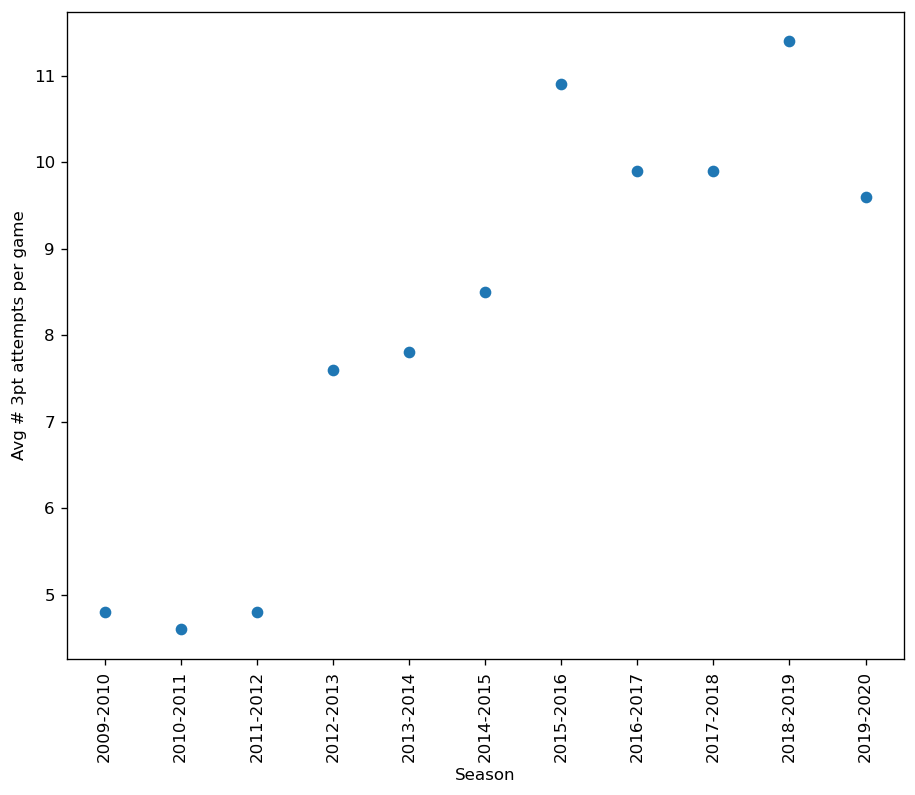

In [138]:
plt.scatter(x = index, y = 'Avg # 3pt attempts per game', data = stephen_curry_3pt_att)
plt.xticks(x= index, rotation='vertical')
plt.xlabel("Season")
plt.ylabel("Avg # 3pt attempts per game")


We will come back to this table later on. First, why don't we take a look at the trend of the average number of 3-point attempts for each team from the 1996-97 to the 2008-2009 (the season before Curry was drafted).

C:\Users\19713\OneDrive\Documents\lib\site-packages\pandas\plotting\_matplotlib\core.py:386: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = self.plt.figure(figsize=self.figsize)


Text(0, 0.5, 'Average 3-pt attempts')

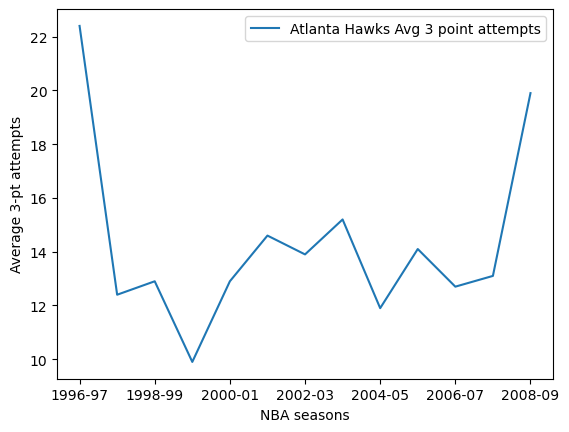

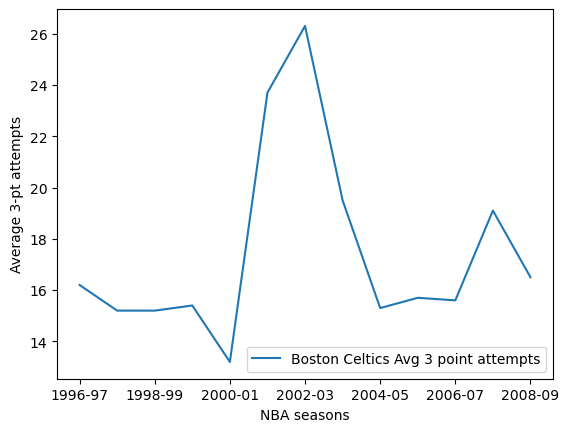

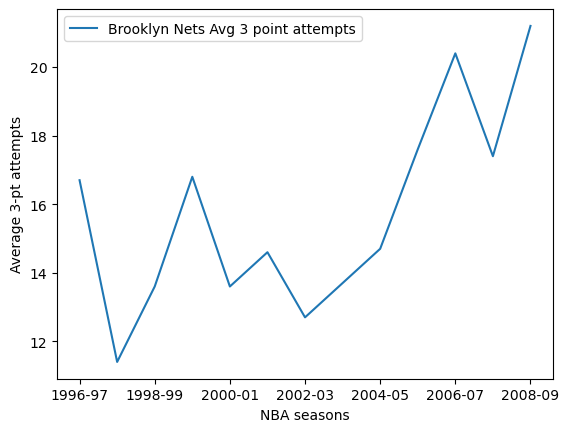

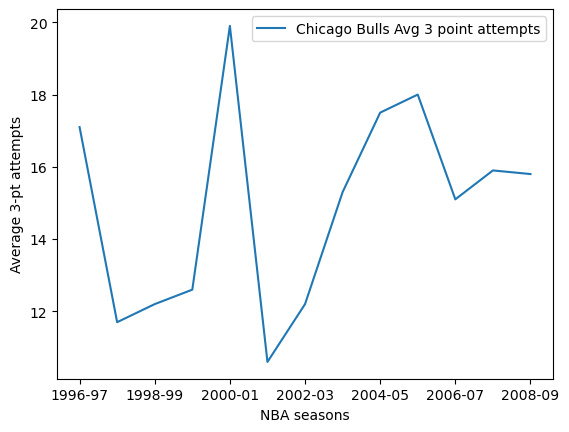

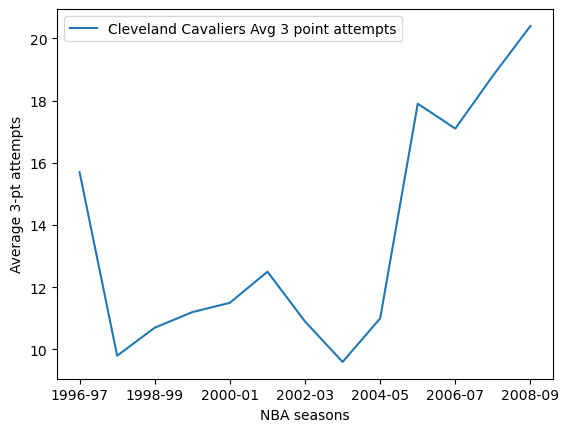

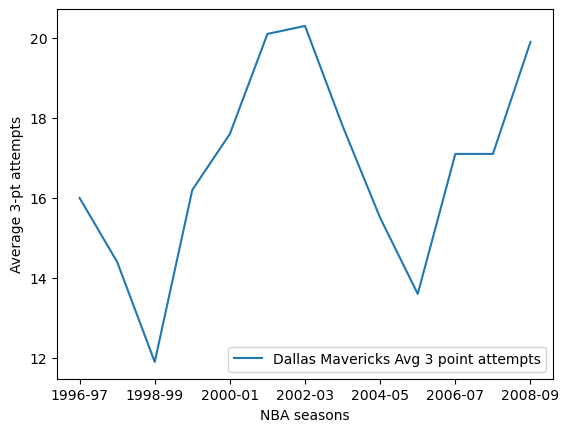

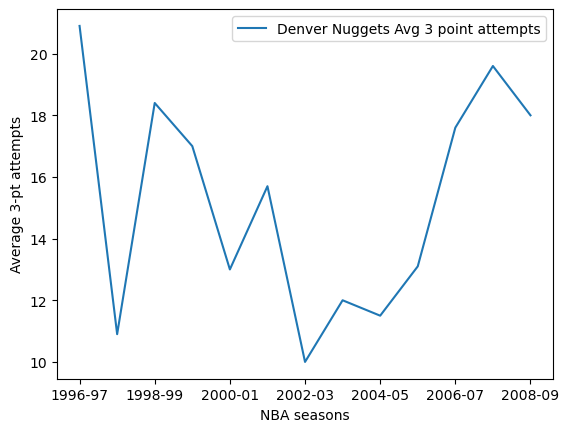

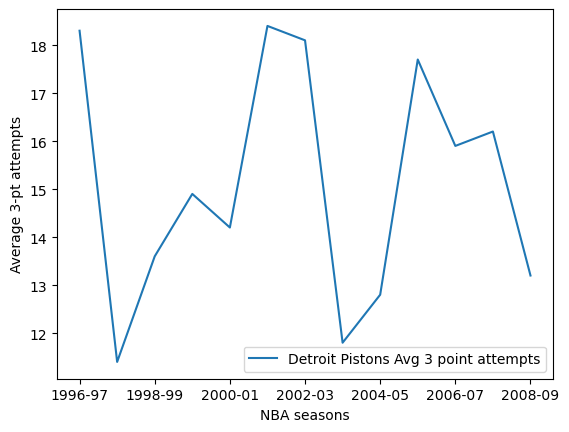

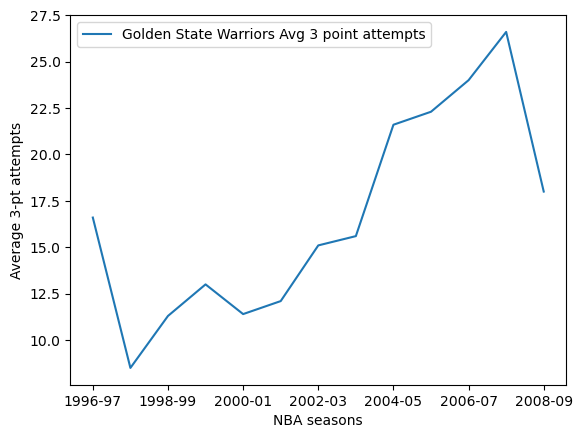

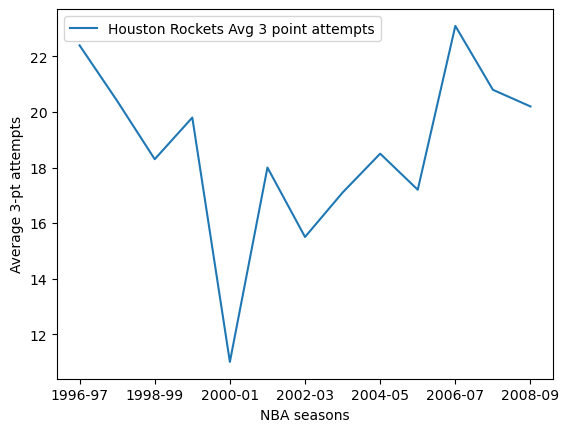

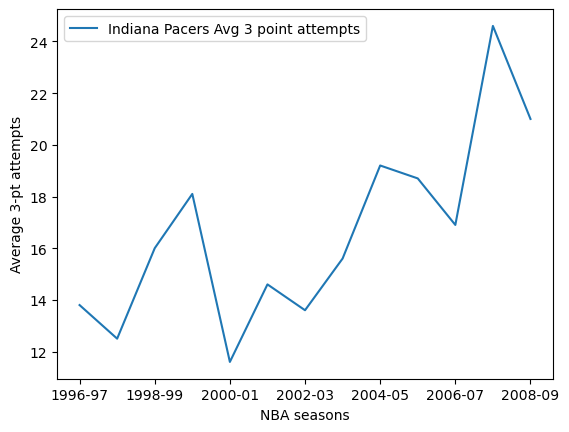

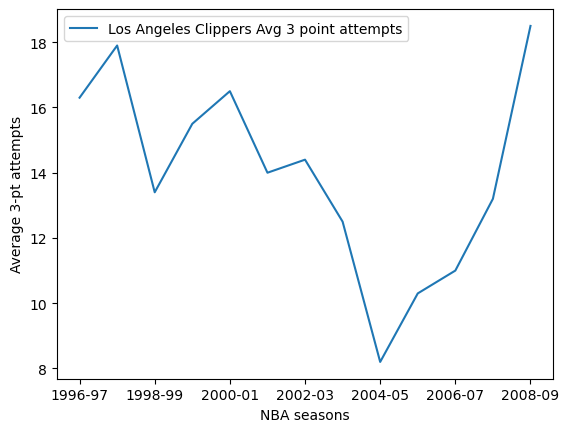

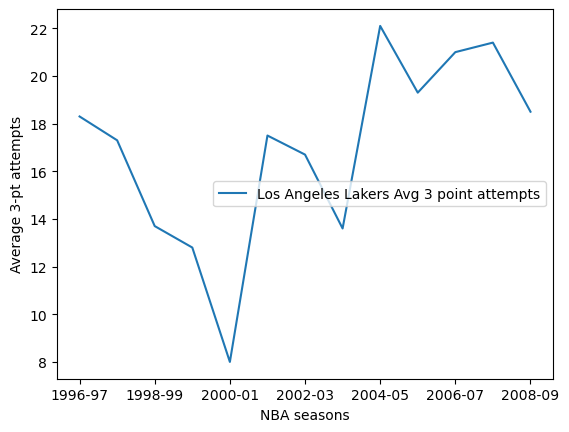

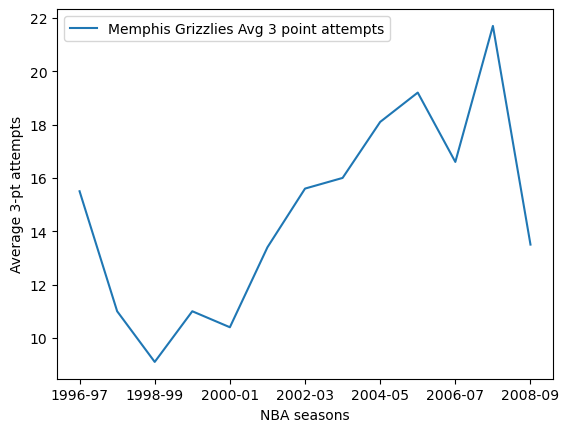

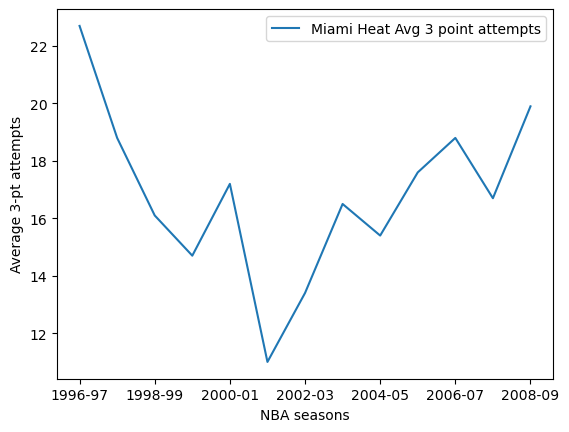

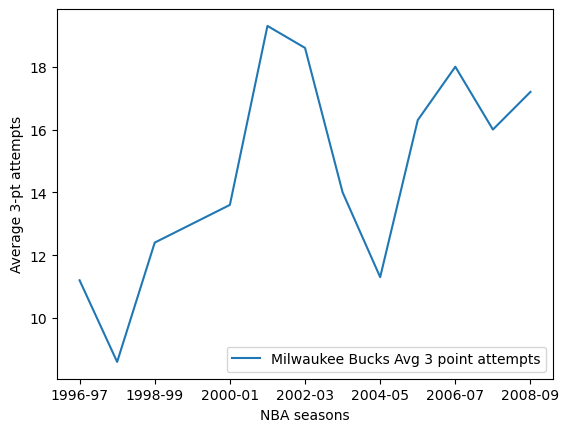

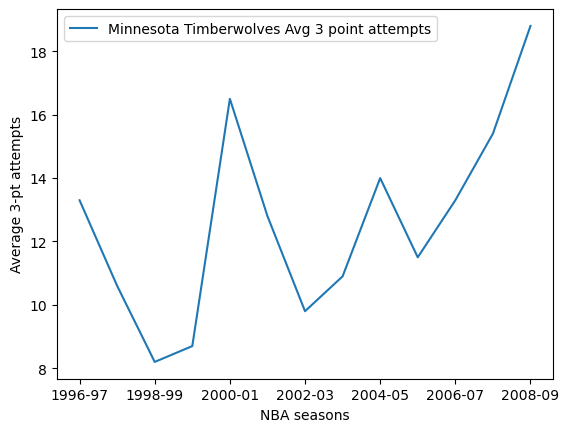

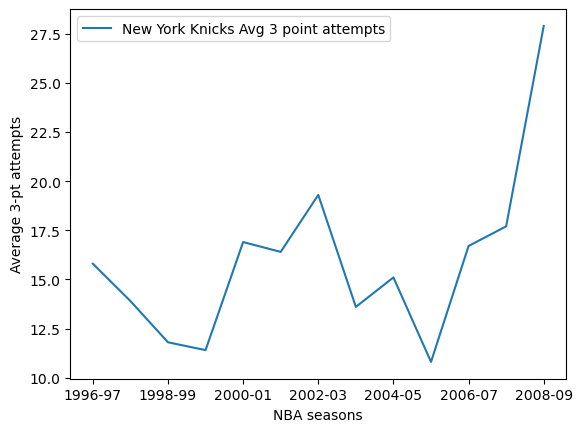

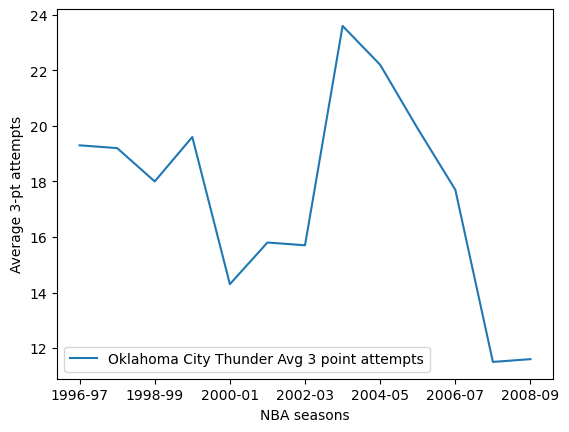

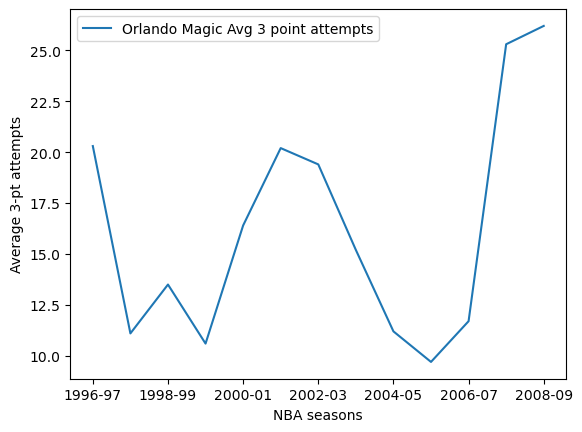

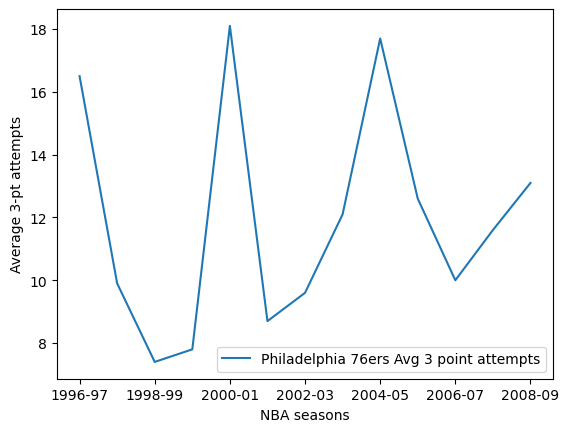

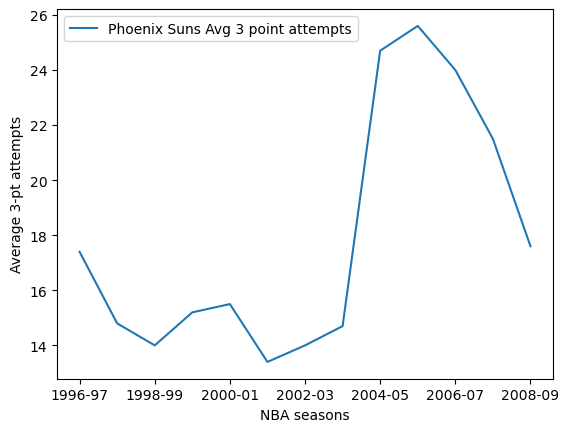

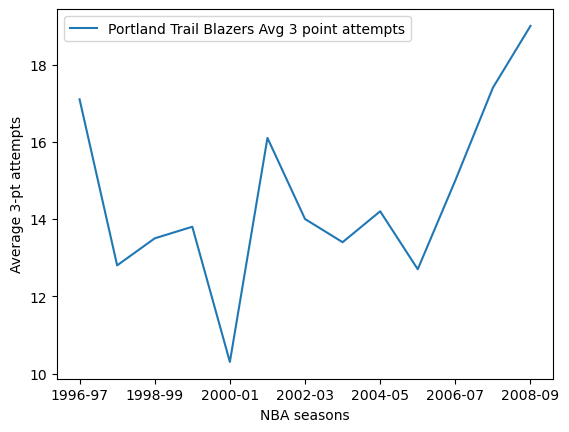

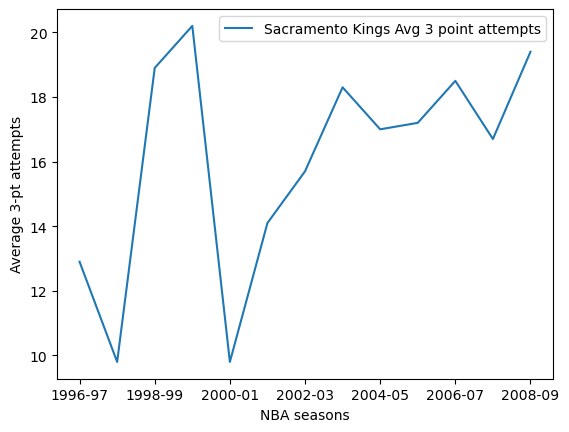

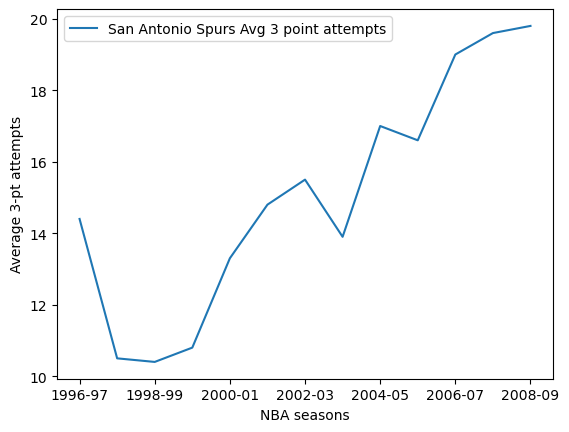

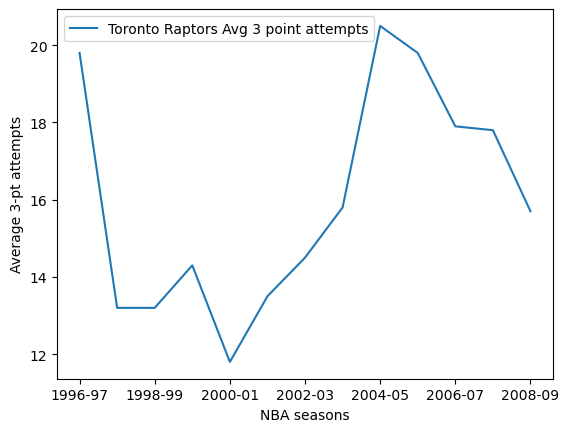

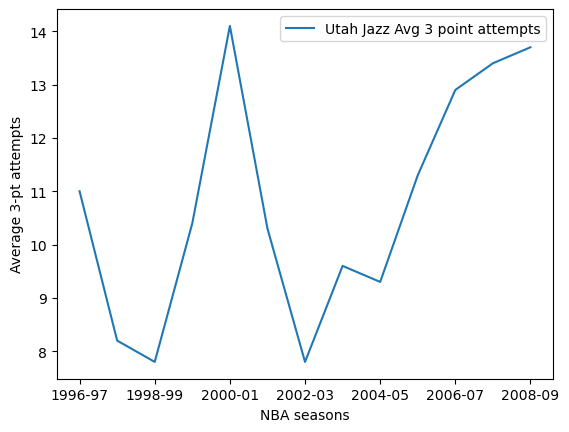

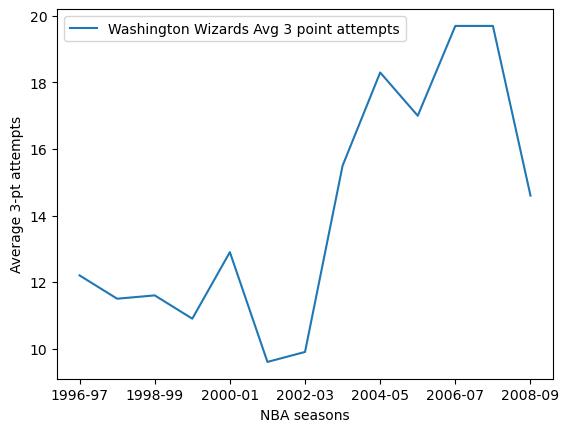

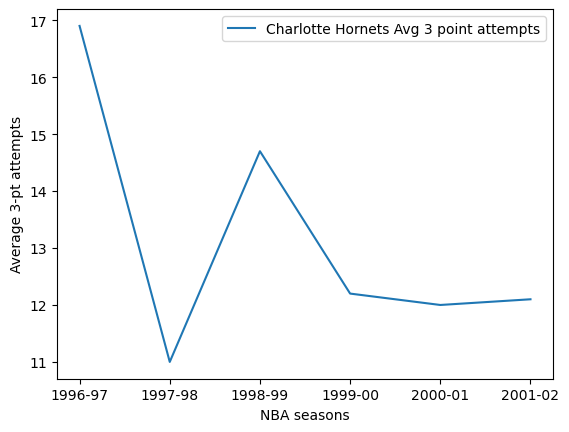

In [25]:
first_years = ['1996-97', '1997-98', '1998-99', '1999-00', '2000-01', '2001-02', '2002-03', '2003-04', '2004-05', '2005-06', '2006-07', '2007-08', '2008-09']
hawks_3pta = []
for i in range(0,13):
    hawks_3pta.append(df.iloc[2,2+4*i])
hawks_3pta
hawks_dict = pd.DataFrame({'NBA seasons' : first_years, 'Atlanta Hawks Avg 3 point attempts': hawks_3pta})
hawks_dict_plt = hawks_dict.plot( 'NBA seasons' , 'Atlanta Hawks Avg 3 point attempts' )
hawks_dict_plt.set_ylabel("Average 3-pt attempts")
celtics_3pta = []
for i in range(0,13):
    celtics_3pta.append(df.iloc[3,2+4*i])
celtics_dict = pd.DataFrame({'NBA seasons' : first_years, 'Boston Celtics Avg 3 point attempts': celtics_3pta})
celtics_dict_plt = celtics_dict.plot( 'NBA seasons' , 'Boston Celtics Avg 3 point attempts' )
celtics_dict_plt.set_ylabel("Average 3-pt attempts")
nets_3pta = []
for i in range(0,13):
    nets_3pta.append(df.iloc[4,2+4*i])
nets_dict = pd.DataFrame({'NBA seasons' : first_years, 'Brooklyn Nets Avg 3 point attempts': nets_3pta})
nets_dict_plt = nets_dict.plot( 'NBA seasons' , 'Brooklyn Nets Avg 3 point attempts' )
nets_dict_plt.set_ylabel("Average 3-pt attempts")
bulls_3pta = []
for i in range(0,13):
    bulls_3pta.append(df.iloc[5,2+4*i])
bulls_dict = pd.DataFrame({'NBA seasons' : first_years, 'Chicago Bulls Avg 3 point attempts': bulls_3pta})
bulls_dict_plt = bulls_dict.plot( 'NBA seasons' , 'Chicago Bulls Avg 3 point attempts' )
bulls_dict_plt.set_ylabel("Average 3-pt attempts")

cavs_3pta = []
for i in range(0,13):
    cavs_3pta.append(df.iloc[6,2+4*i])
cavs_dict = pd.DataFrame({'NBA seasons' : first_years, 'Cleveland Cavaliers Avg 3 point attempts': cavs_3pta})
cavs_dict_plt = cavs_dict.plot( 'NBA seasons' , 'Cleveland Cavaliers Avg 3 point attempts' )
cavs_dict_plt.set_ylabel("Average 3-pt attempts")

mavs_3pta = []
for i in range(0,13):
    mavs_3pta.append(df.iloc[7,2+4*i])
mavs_dict = pd.DataFrame({'NBA seasons' : first_years, 'Dallas Mavericks Avg 3 point attempts': mavs_3pta})
mavs_dict_plt = mavs_dict.plot( 'NBA seasons' , 'Dallas Mavericks Avg 3 point attempts' )
mavs_dict_plt.set_ylabel("Average 3-pt attempts")

nuggets_3pta = []
for i in range(0,13):
    nuggets_3pta.append(df.iloc[8,2+4*i])
nuggets_dict = pd.DataFrame({'NBA seasons' : first_years, 'Denver Nuggets Avg 3 point attempts': nuggets_3pta})
nuggets_dict_plt = nuggets_dict.plot( 'NBA seasons' , 'Denver Nuggets Avg 3 point attempts' )
nuggets_dict_plt.set_ylabel("Average 3-pt attempts")

pistons_3pta = []
for i in range(0,13):
    pistons_3pta.append(df.iloc[9,2+4*i])
pistons_dict = pd.DataFrame({'NBA seasons' : first_years, 'Detroit Pistons Avg 3 point attempts': pistons_3pta})
pistons_dict_plt = pistons_dict.plot( 'NBA seasons' , 'Detroit Pistons Avg 3 point attempts' )
pistons_dict_plt.set_ylabel("Average 3-pt attempts")

warriors_3pta = []
for i in range(0,13):
    warriors_3pta.append(df.iloc[10,2+4*i])
warriors_dict = pd.DataFrame({'NBA seasons' : first_years, 'Golden State Warriors Avg 3 point attempts': warriors_3pta})
warriors_dict_plt = warriors_dict.plot( 'NBA seasons' , 'Golden State Warriors Avg 3 point attempts' )
warriors_dict_plt.set_ylabel("Average 3-pt attempts")

rockets_3pta = []
for i in range(0,13):
    rockets_3pta.append(df.iloc[11,2+4*i])
rockets_dict = pd.DataFrame({'NBA seasons' : first_years, 'Houston Rockets Avg 3 point attempts': rockets_3pta})
rockets_dict_plt = rockets_dict.plot( 'NBA seasons' , 'Houston Rockets Avg 3 point attempts' )
rockets_dict_plt.set_ylabel("Average 3-pt attempts")

pacers_3pta = []
for i in range(0,13):
    pacers_3pta.append(df.iloc[12,2+4*i])
pacers_dict = pd.DataFrame({'NBA seasons' : first_years, 'Indiana Pacers Avg 3 point attempts': pacers_3pta})
pacers_dict_plt = pacers_dict.plot( 'NBA seasons' , 'Indiana Pacers Avg 3 point attempts' )
pacers_dict_plt.set_ylabel("Average 3-pt attempts")

clippers_3pta = []
for i in range(0,13):
    clippers_3pta.append(df.iloc[13,2+4*i])
clippers_dict = pd.DataFrame({'NBA seasons' : first_years, 'Los Angeles Clippers Avg 3 point attempts': clippers_3pta})
clippers_dict_plt = clippers_dict.plot( 'NBA seasons' , 'Los Angeles Clippers Avg 3 point attempts' )
clippers_dict_plt.set_ylabel("Average 3-pt attempts")

lakers_3pta = []
for i in range(0,13):
    lakers_3pta.append(df.iloc[14,2+4*i])
lakers_dict = pd.DataFrame({'NBA seasons' : first_years, 'Los Angeles Lakers Avg 3 point attempts': lakers_3pta})
lakers_dict_plt = lakers_dict.plot( 'NBA seasons' , 'Los Angeles Lakers Avg 3 point attempts' )
lakers_dict_plt.set_ylabel("Average 3-pt attempts")

grizzlies_3pta = []
for i in range(0,13):
    grizzlies_3pta.append(df.iloc[15,2+4*i])
grizzlies_dict = pd.DataFrame({'NBA seasons' : first_years, 'Memphis Grizzlies Avg 3 point attempts': grizzlies_3pta})
grizzlies_dict_plt = grizzlies_dict.plot( 'NBA seasons' , 'Memphis Grizzlies Avg 3 point attempts' )
grizzlies_dict_plt.set_ylabel("Average 3-pt attempts")

heat_3pta = []
for i in range(0,13):
    heat_3pta.append(df.iloc[16,2+4*i])
heat_dict = pd.DataFrame({'NBA seasons' : first_years, 'Miami Heat Avg 3 point attempts': heat_3pta})
heat_dict_plt = heat_dict.plot( 'NBA seasons' , 'Miami Heat Avg 3 point attempts' )
heat_dict_plt.set_ylabel("Average 3-pt attempts")

bucks_3pta = []
for i in range(0,13):
    bucks_3pta.append(df.iloc[17,2+4*i])
bucks_dict = pd.DataFrame({'NBA seasons' : first_years, 'Milwaukee Bucks Avg 3 point attempts': bucks_3pta})
bucks_dict_plt = bucks_dict.plot( 'NBA seasons' , 'Milwaukee Bucks Avg 3 point attempts' )
bucks_dict_plt.set_ylabel("Average 3-pt attempts")

wolves_3pta = []
for i in range(0,13):
    wolves_3pta.append(df.iloc[18,2+4*i])
wolves_dict = pd.DataFrame({'NBA seasons' : first_years, 'Minnesota Timberwolves Avg 3 point attempts': wolves_3pta})
wolves_dict_plt = wolves_dict.plot( 'NBA seasons' , 'Minnesota Timberwolves Avg 3 point attempts' )
wolves_dict_plt.set_ylabel("Average 3-pt attempts")

knicks_3pta = []
for i in range(0,13):
    knicks_3pta.append(df.iloc[19,2+4*i])
knicks_dict = pd.DataFrame({'NBA seasons' : first_years, 'New York Knicks Avg 3 point attempts': knicks_3pta})
knicks_dict_plt = knicks_dict.plot( 'NBA seasons' , 'New York Knicks Avg 3 point attempts' )
knicks_dict_plt.set_ylabel("Average 3-pt attempts")

thunder_3pta = []
for i in range(0,13):
    thunder_3pta.append(df.iloc[20,2+4*i])
thunder_dict = pd.DataFrame({'NBA seasons' : first_years, 'Oklahoma City Thunder Avg 3 point attempts': thunder_3pta})
thunder_dict_plt = thunder_dict.plot( 'NBA seasons' , 'Oklahoma City Thunder Avg 3 point attempts' )
thunder_dict_plt.set_ylabel("Average 3-pt attempts")

magic_3pta = []
for i in range(0,13):
    magic_3pta.append(df.iloc[21,2+4*i])
magic_dict = pd.DataFrame({'NBA seasons' : first_years, 'Orlando Magic Avg 3 point attempts': magic_3pta})
magic_dict_plt = magic_dict.plot( 'NBA seasons' , 'Orlando Magic Avg 3 point attempts' )
magic_dict_plt.set_ylabel("Average 3-pt attempts")

sixers_3pta = []
for i in range(0,13):
    sixers_3pta.append(df.iloc[22,2+4*i])
sixers_dict = pd.DataFrame({'NBA seasons' : first_years, 'Philadelphia 76ers Avg 3 point attempts': sixers_3pta})
sixers_dict_plt = sixers_dict.plot( 'NBA seasons' , 'Philadelphia 76ers Avg 3 point attempts' )
sixers_dict_plt.set_ylabel("Average 3-pt attempts")

suns_3pta = []
for i in range(0,13):
    suns_3pta.append(df.iloc[23,2+4*i])
suns_dict = pd.DataFrame({'NBA seasons' : first_years, 'Phoenix Suns Avg 3 point attempts': suns_3pta})
suns_dict_plt = suns_dict.plot( 'NBA seasons' , 'Phoenix Suns Avg 3 point attempts' )
suns_dict_plt.set_ylabel("Average 3-pt attempts")

blazers_3pta = []
for i in range(0,13):
    blazers_3pta.append(df.iloc[24,2+4*i])
blazers_dict = pd.DataFrame({'NBA seasons' : first_years, 'Portland Trail Blazers Avg 3 point attempts': blazers_3pta})
blazers_dict_plt = blazers_dict.plot( 'NBA seasons' , 'Portland Trail Blazers Avg 3 point attempts' )
blazers_dict_plt.set_ylabel("Average 3-pt attempts")

kings_3pta = []
for i in range(0,13):
    kings_3pta.append(df.iloc[25,2+4*i])
kings_dict = pd.DataFrame({'NBA seasons' : first_years, 'Sacramento Kings Avg 3 point attempts': kings_3pta})
kings_dict_plt = kings_dict.plot( 'NBA seasons' , 'Sacramento Kings Avg 3 point attempts' )
kings_dict_plt.set_ylabel("Average 3-pt attempts")

spurs_3pta = []
for i in range(0,13):
    spurs_3pta.append(df.iloc[26,2+4*i])
spurs_dict = pd.DataFrame({'NBA seasons' : first_years, 'San Antonio Spurs Avg 3 point attempts': spurs_3pta})
spurs_dict_plt = spurs_dict.plot( 'NBA seasons' , 'San Antonio Spurs Avg 3 point attempts' )
spurs_dict_plt.set_ylabel("Average 3-pt attempts")

raptors_3pta = []
for i in range(0,13):
    raptors_3pta.append(df.iloc[27,2+4*i])
raptors_dict = pd.DataFrame({'NBA seasons' : first_years, 'Toronto Raptors Avg 3 point attempts': raptors_3pta})
raptors_dict_plt = raptors_dict.plot( 'NBA seasons' , 'Toronto Raptors Avg 3 point attempts' )
raptors_dict_plt.set_ylabel("Average 3-pt attempts")

jazz_3pta = []
for i in range(0,13):
    jazz_3pta.append(df.iloc[28,2+4*i])
jazz_dict = pd.DataFrame({'NBA seasons' : first_years, 'Utah Jazz Avg 3 point attempts': jazz_3pta})
jazz_dict_plt = jazz_dict.plot( 'NBA seasons' , 'Utah Jazz Avg 3 point attempts' )
jazz_dict_plt.set_ylabel("Average 3-pt attempts")

wizards_3pta = []
for i in range(0,13):
    wizards_3pta.append(df.iloc[29,2+4*i])
wizards_dict = pd.DataFrame({'NBA seasons' : first_years, 'Washington Wizards Avg 3 point attempts': wizards_3pta})
wizards_dict_plt = wizards_dict.plot( 'NBA seasons' , 'Washington Wizards Avg 3 point attempts' )
wizards_dict_plt.set_ylabel("Average 3-pt attempts")
hornets_years = ['1996-97',
 '1997-98',
 '1998-99',
 '1999-00',
 '2000-01',
 '2001-02']
hornets_3pta = []
for i in range(0,6):
    hornets_3pta.append(df.iloc[30,2+4*i])
hornets_dict = pd.DataFrame({'NBA seasons' : hornets_years, 'Charlotte Hornets Avg 3 point attempts': hornets_3pta})
hornets_dict_plt = hornets_dict.plot( 'NBA seasons' , 'Charlotte Hornets Avg 3 point attempts' )
hornets_dict_plt.set_ylabel("Average 3-pt attempts")

It is not exactly clear how we should describe these trends as a whole, but what I think would be accurate to say is that generally speaking, the league as a whole was attempting more and more threes, albeit at a somewhat gradual pace. What was the average number of 3-point attempts the league took from the 1996-97 to the 2008-09 season?

In [26]:
#This is the average number of 3 point attempts the league took as a whole 
#from the 1996-97 to the 2008-09 season.
first_row = pd.DataFrame(df.loc[1])
first_row_list = list(first_row.loc[first_row[1] == '3PA'].index)
first_row_list2 = [x for x in first_row_list if x < 53]
list1 = list(df.iloc[:,first_row_list2].iloc[32,:])
round(np.mean(list1), 2)

15.34

Let's compare that to the average number of 3-point attempts the league took from the 2009-10 to the 2019-20 season.

In [27]:
#This is the average number of 3 point attempts the league took as a whole 
#from the 2009-10 to the 2019-20 season.
first_row_list3 = [x for x in first_row_list if x > 52]
list2 = list(df.iloc[:,first_row_list3].iloc[32,:])
round(np.mean(list2), 2)

24.06

As we can see, NBA teams averaged nearly 9 more 3-point attempts during the second period of seasons than the first! Why did NBA teams decide to shoot a more substantial amount of threes? It may be due to players like Stephen Curry, who with his shooting a high volume of threes on above league average efficiency, showed the league the value of having good 3-point shooters that can shoot a high volume of threes. That being said, Curry did not come out of the gate shooting a high number of threes. Let's take a look at the average number of 3-point attempts Curry took in his first three seasons in the league.

In [28]:
round(stephen_curry_3pt_att.iloc[[0,1,2],0].mean(), 2)

4.73

We see that Curry averaged 4.73 3-point attempts in his first three seasons. But now take a look at this!

In [29]:
pd.DataFrame(stephen_curry_3pt_att.iloc[4,:]).T

,Avg # 3pt attempts per game
2013-2014,7.8


We see that Curry took it to another gear in the 2013-2014 in regards to his shooting. In fact, let's take a look at his average number of 3-point attempts from 2013-14 to 2019-2020. 

In [30]:
round(stephen_curry_3pt_att.iloc[range(3,11),0].mean(), 2)

9.45

Within these two time spans, Curry doubled the number of 3-point attempts! Let's now compare the average number of 3-point attempts the league took as a whole from 1996-97 to 2012-2013 and from 2013-2014 to 2019-2020.

In [31]:
#This is the average number of 3-point attempts the league took as a whole 
#from 1996-1997 to 2012-2013
first_row_list2 = [x for x in first_row_list if x<69]
first_row_list2
round(df.iloc[32,first_row_list2].mean(),2)

16.11

In [32]:
#This is the average number of 3-point attempts the league took as a whole 
#from 2012-2013 to 2019-2020
first_row_list3 = [x for x in first_row_list if x>69]
first_row_list3
round(df.iloc[32,first_row_list3].mean(),2)

27.16

The least we may conclude from this investigation is that there is a positive relationship between Stephen Curry's average number of 3-point attempts (combined with his efficient 3-point shooting) and the number of 3-point attempts the league took as a whole within the time span that Curry has been in the league.

Exploratory Data Analysis

We may examine the correlation between the average number of 3-point attempts by Curry and the average number of 3-point attempts by the league as a whole.

In [33]:
stephen_curry_3pt_att['Avg # 3pt attempts per game']
league_vs_curry_dict = {'Average number of 3-pt attempts, league': list2, 'Average number of 3-pt attempts, Curry': stephen_curry_3pt_att['Avg # 3pt attempts per game']}
league_vs_curry = pd.DataFrame(league_vs_curry_dict)
league_vs_curry.corr()

,"Average number of 3-pt attempts, league","Average number of 3-pt attempts, Curry"
"Average number of 3-pt attempts, league",1.000000,0.823517
"Average number of 3-pt attempts, Curry",0.823517,1.000000


From the above table, we can see that the two factors have a correlation of 0.823517, which is very high. We can also see this positive relationship in the following plot.

<AxesSubplot:xlabel='Average number of 3-pt attempts, league', ylabel='Average number of 3-pt attempts, Curry'>

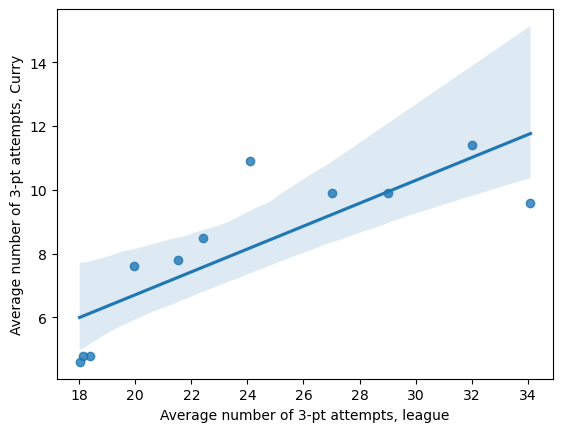

In [34]:
sns.regplot(x = 'Average number of 3-pt attempts, league', y = 'Average number of 3-pt attempts, Curry', data = league_vs_curry)

The next question that I would like to explore is: what are some variables that can predict the number of 3-point attempts the league takes as whole? In order to this, let us construct the following dataframe. 

In [35]:
threePM_index = []
i = -3
while i < 93:
    i = i+4
    threePM_index.append(i)
threePm = pd.DataFrame(df.iloc[:, threePM_index])


In [36]:
threePM_avg = pd.DataFrame(threePm.iloc[32,:])
threePM_avg.columns = ['Average number of 3-pointers made, league']


In [37]:
index = df.iloc[2:,0]

In [38]:
threePm.reset_index(drop=True, inplace=True)
threePm = threePm.set_axis(range(threePm.shape[1]), axis=1)

In [39]:
threePm.iloc[0,:]
threePM_avg = threePM_avg.set_index(threePm.iloc[0,:])

In [40]:
threeP_att_index = []
i = -2
while i < 93:
    i = i+4
    threeP_att_index.append(i)
threeP_att_avg = pd.DataFrame(df.iloc[32, threeP_att_index])
threeP_att_avg.reset_index(drop=True, inplace=True)
threeP_att_avg.columns = ['Average number of 3 point attempts per game, league']
threeP_att_avg = threeP_att_avg.set_index(threePm.iloc[0,:])

In [41]:
three_P_percentage_index = []
i = -1
while i < 93:
    i = i+4
    three_P_percentage_index.append(i)
three_P_percentage = pd.DataFrame(df.iloc[:, three_P_percentage_index])
three_P_percentage_avg = pd.DataFrame(three_P_percentage.iloc[32, :])

In [42]:
three_P_percentage_avg.reset_index(drop=True, inplace=True)
three_P_percentage_avg.columns = ['Average 3pt field goal percentage, league']
three_P_percentage_avg = three_P_percentage_avg.set_index(threePm.iloc[0,:])

In [43]:
three_P_share_index = []
i = 0
while i < 93:
    i = i+4
    three_P_share_index.append(i)
three_P_share = pd.DataFrame(df.iloc[:, three_P_share_index])
three_P_share_avg = pd.DataFrame(three_P_share.iloc[32, :])
three_P_share_avg.reset_index(drop=True, inplace=True)
three_P_share_avg.columns = ['Average 3pt% share in total points, league']
three_P_share_avg = three_P_share_avg.set_index(threePm.iloc[0,:])

In [44]:
df2 = threePM_avg.join(threeP_att_avg.set_index(threePm.iloc[0,:]), on = threePm.iloc[0,:]).join(three_P_percentage_avg.set_index(threePm.iloc[0,:]), on = threePm.iloc[0,:]).join(three_P_share_avg.set_index(threePm.iloc[0,:]), on = threePm.iloc[0,:])
df2

,"Average number of 3-pointers made, league","Average number of 3 point attempts per game, league","Average 3pt field goal percentage, league","Average 3pt% share in total points, league"
0,,,,
1996-97,6.044828,16.7931,35.96207,18.735517
1997-98,4.403448,12.713793,34.37931,13.875862
1998-99,4.455172,13.16552,33.61724,14.546897
1999-00,4.837931,13.71724,35.28966,14.85172
2000-01,4.841379,13.706897,35.182759,15.277241
2001-02,5.213793,14.75517,35.17586,16.32759
2002-03,5.134483,14.67586,34.66207,16.14483
2003-04,5.182759,14.92069,34.55517,16.62759
2004-05,5.6,15.75,35.31667,17.22026


In the above dataframe, we have some potential variables that can function as predictors of the average number of 3 point attempts per game. To see whether the first variable "Average number of 3-pointers made, league" can be such a predictor, let us take a look at the following:

Text(0, 0.5, 'Average number of 3-pointers made, league')

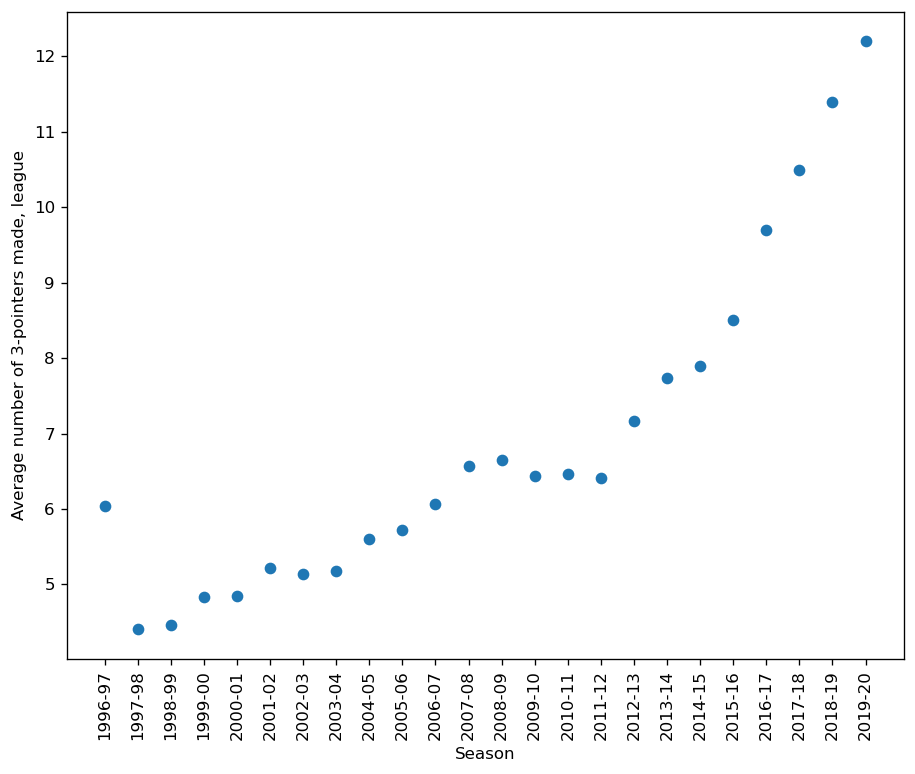

In [120]:
x=threePm.iloc[0,:]
plt.scatter(x=threePm.iloc[0,:], y='Average number of 3-pointers made, league', data=df2)
plt.xticks(x, rotation='vertical')
plt.xlabel("Season")
plt.ylabel("Average number of 3-pointers made, league")

It is obvious to see that not only are teams shooting more threes, they are on average making more of them as well. However, are teams becoming more efficient at shoting the 3-ball and hence are making more of them, or is this pattern mostly a result of teams shooting more threes overall? Let's find out. 

Text(0, 0.5, 'Average 3pt field goal percentage, league')

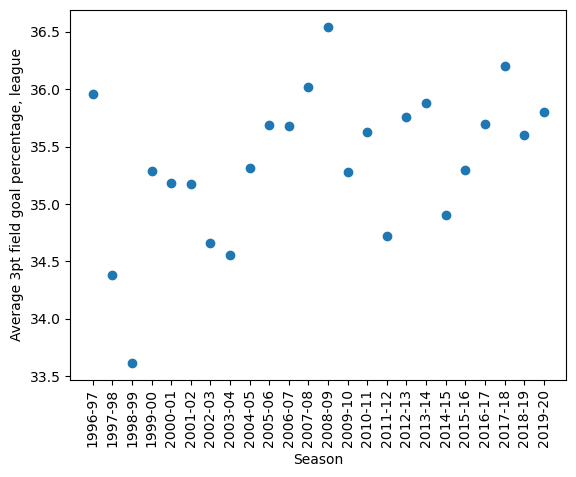

In [46]:
x=threePm.iloc[0,:]
plt.scatter(x=threePm.iloc[0,:], y='Average 3pt field goal percentage, league', data=df2)
plt.xticks(x, rotation='vertical')
plt.xlabel("Season")
plt.ylabel("Average 3pt field goal percentage, league")

The above plot shows the average 3pt field goal percentage for the league as a whole from the years 1996 to 2020. As we can see, there is no discernible pattern in regards to whether teams have overall become better at shooting the 3-ball. 

In [47]:
print('The mean 3pt field goal percentage from the 1996-97 to 2019-2020 season is', df2['Average 3pt field goal percentage, league'].mean())
print('The min 3pt field goal percentage is', df2['Average 3pt field goal percentage, league'].min())
print('The max 3pt field goal percentage is', df2['Average 3pt field goal percentage, league'].max())
print('The range is', df2['Average 3pt field goal percentage, league'].max() - df2['Average 3pt field goal percentage, league'].min())

The mean 3pt field goal percentage from the 1996-97 to 2019-2020 season is 35.368131192528736
The min 3pt field goal percentage is 33.61724
The max 3pt field goal percentage is 36.54333
The range is 2.926089999999995


Text(0, 0.5, 'Average number of 3 point attempts per game, league')

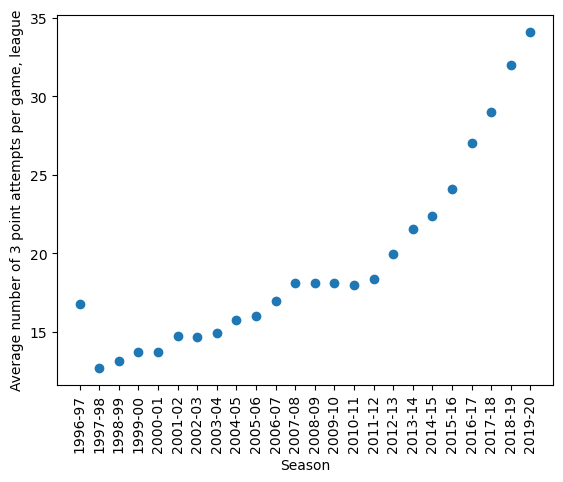

In [48]:
x=threePm.iloc[0,:]
plt.scatter(x=threePm.iloc[0,:], y='Average number of 3 point attempts per game, league', data=df2)
plt.xticks(x, rotation='vertical')
plt.xlabel("Season")
plt.ylabel("Average number of 3 point attempts per game, league")

Surprisingly enough, even though teams are shooting more and more 3-point shots, they are not getting significantly any better or worse at shooting it. It seems as though the average number of threes made is mostly a function of teams shooting more threes and therefore would not be a good predictive variable for the average number of threes attempted.

What about the average 3pt% share in total points? Let's take a look at a plot of this variable from the 1996-97 to 2019-2020. 

Text(0, 0.5, 'Average 3pt% share in total points, league')

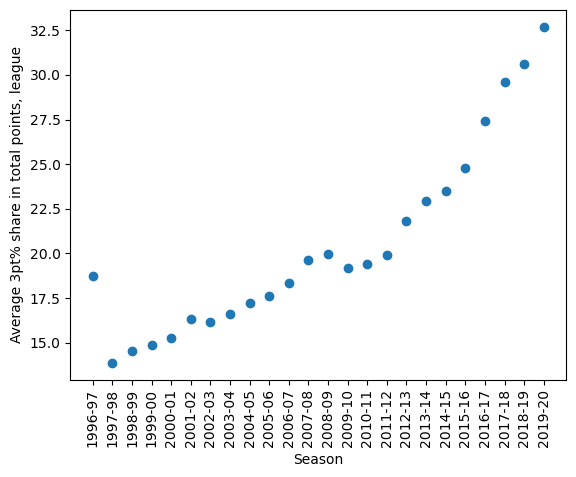

In [49]:
x=threePm.iloc[0,:]
plt.scatter(x=threePm.iloc[0,:], y='Average 3pt% share in total points, league', data=df2)
plt.xticks(x, rotation='vertical')
plt.xlabel("Season")
plt.ylabel("Average 3pt% share in total points, league")

It is clear to see that as the years go by, 3-pointers have accounted for more and more of the team's total points. With the average number of 3-point attempts increasing over time and teams not becoming significantly more or less efficient at shooting the 3-ball, this could account for the increasing trend we see in the average 3pt% share in total points. However, what we still need to consider is whether this trend is due to the average number of field goal attempts staying relatively stable and that they are shooting more threes than twos, or if the league is on average attempting more shots, which also includes taking more 3-point shots as well. Let's investigate this by bringing on another dataframe that we will need. 

In [50]:
b = pd.read_csv('C:\\Users\\19713\\Desktop\\Springboard\\nba_team_stats_00_to_21.csv')
nba_fga = b[['FGA', 'SEASON']]
nba_fga

,FGA,SEASON
0,89.4,2020-21
1,86.5,2020-21
2,93.4,2020-21
3,85.7,2020-21
4,87.0,2020-21
...,...,...
621,81.3,2000-01
622,79.7,2000-01
623,78.7,2000-01
624,87.5,2000-01


In [51]:
c = pd.DataFrame(nba_fga.groupby(by = 'SEASON')['FGA'].describe())
c

,count,mean,std,min,25%,50%,75%,max
SEASON,,,,,,,,
2000-01,29.0,80.603448,2.984182,75.6,78.700,79.70,82.900,87.5
2001-02,29.0,81.265517,2.430061,76.8,79.700,81.30,83.400,85.4
2002-03,29.0,80.782759,2.459104,75.5,79.200,81.00,82.300,85.2
2003-04,29.0,79.817241,2.649268,75.3,78.200,80.00,81.400,88.2
2004-05,30.0,80.336667,2.602583,75.2,78.300,80.45,81.500,85.8
2005-06,30.0,78.990000,2.857338,74.7,77.025,78.50,80.900,87.4
2006-07,30.0,79.710000,2.423498,74.3,78.025,79.45,81.275,86.0
2007-08,30.0,81.510000,2.866375,76.7,79.825,81.65,82.850,90.3
2008-09,30.0,80.916667,2.671701,76.8,79.250,80.90,82.275,86.5


This dataframe shows the mean number of field goal attempts from the 2000-01 season to the 2020-21 season, where the averages are found in the mean column. Let's plot this to see if there are any patterns we can observe. 

Text(0, 0.5, 'Average number of field goal attempts, league')

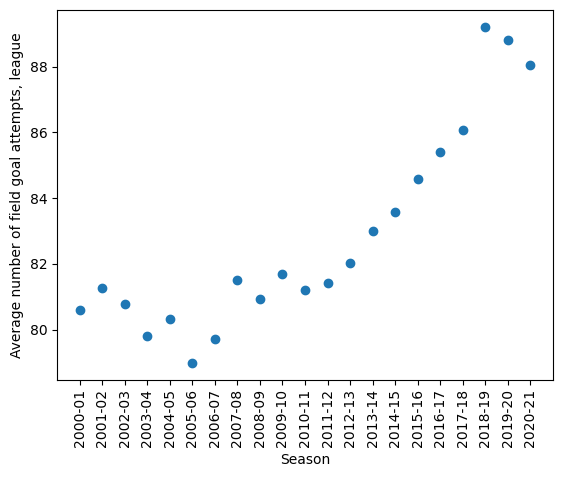

In [52]:
plt.scatter(x = c.index, y = 'mean', data = c)
plt.xticks(x= c.index, rotation='vertical')
plt.xlabel("Season")
plt.ylabel("Average number of field goal attempts, league")

We can see from this plot that the teams as a whole were not only shooting more threes, but attempting more shots in general as well. This implies that a significant proportion of the additional shot attempts the league is taking are threes, which could partially account for the increase in 3-point attempts over time. With this in mind, let's see if we can predict the average number of 3-point attempts based on the average 3pt% share in total points using linear regression. 

In [53]:
avg_3_pt_attempts = pd.DataFrame(df2['Average number of 3 point attempts per game, league'])
avg_3_pt_attempts_lag_1 = avg_3_pt_attempts.shift(periods = 1, fill_value = 18.691229)
avg_3_pt_attempts_lag_2 = avg_3_pt_attempts.shift(periods = 2, fill_value = 18.086285)
avg_3_pt_attempts_lag_3 = avg_3_pt_attempts.shift(periods = 3, fill_value = 17.566585)
avg_3_pt_attempts_lag_4 = avg_3_pt_attempts.shift(periods = 4, fill_value = 17.094914)
avg_3_pt_attempts_lag_5 = avg_3_pt_attempts.shift(periods = 5, fill_value = 16.726225)

In [54]:
avg_3_pt_attempts['avg_3_pt_attempts_lag_1'] = avg_3_pt_attempts_lag_1
avg_3_pt_attempts['avg_3_pt_attempts_lag_2'] = avg_3_pt_attempts_lag_2
avg_3_pt_attempts['avg_3_pt_attempts_lag_3'] = avg_3_pt_attempts_lag_3
avg_3_pt_attempts['avg_3_pt_attempts_lag_4'] = avg_3_pt_attempts_lag_4
avg_3_pt_attempts['avg_3_pt_attempts_lag_5'] = avg_3_pt_attempts_lag_5

In [55]:
avg_3_pt_attempts.head()

,"Average number of 3 point attempts per game, league",avg_3_pt_attempts_lag_1,avg_3_pt_attempts_lag_2,avg_3_pt_attempts_lag_3,avg_3_pt_attempts_lag_4,avg_3_pt_attempts_lag_5
0,,,,,,
1996-97,16.7931,18.691229,18.086285,17.566585,17.094914,16.726225
1997-98,12.713793,16.7931,18.086285,17.566585,17.094914,16.726225
1998-99,13.16552,12.713793,16.7931,17.566585,17.094914,16.726225
1999-00,13.71724,13.16552,12.713793,16.7931,17.094914,16.726225
2000-01,13.706897,13.71724,13.16552,12.713793,16.7931,16.726225


In [56]:
Season = avg_3_pt_attempts.index
avg_3_pt_attempts['Season'] = Season

In [57]:
avg_3_pt_attempts = avg_3_pt_attempts.reset_index(drop = True)

In [58]:
Season = avg_3_pt_attempts['Season']

In [59]:
avg_3_pt_attempts_rolling_avg = avg_3_pt_attempts['Average number of 3 point attempts per game, league'].rolling(window = 2).mean().shift(periods=1)
avg_3_pt_attempts['2 year rolling average'] = avg_3_pt_attempts_rolling_avg

In [60]:
avg_3_pt_attempts.columns.tolist().index('Season')

6

In [61]:
avg_3_pt_attempts = avg_3_pt_attempts.iloc[:,[6,0,1,2,3,4,5,7]]

In [62]:
avg_3_pt_attempts_train = avg_3_pt_attempts[avg_3_pt_attempts['Season'] < '2013-2014']
avg_3_pt_attempts_train

,Season,"Average number of 3 point attempts per game, league",avg_3_pt_attempts_lag_1,avg_3_pt_attempts_lag_2,avg_3_pt_attempts_lag_3,avg_3_pt_attempts_lag_4,avg_3_pt_attempts_lag_5,2 year rolling average
0,1996-97,16.7931,18.691229,18.086285,17.566585,17.094914,16.726225,NaN
1,1997-98,12.713793,16.7931,18.086285,17.566585,17.094914,16.726225,NaN
2,1998-99,13.16552,12.713793,16.7931,17.566585,17.094914,16.726225,14.753447
3,1999-00,13.71724,13.16552,12.713793,16.7931,17.094914,16.726225,12.939657
4,2000-01,13.706897,13.71724,13.16552,12.713793,16.7931,16.726225,13.441380
5,2001-02,14.75517,13.706897,13.71724,13.16552,12.713793,16.7931,13.712068
6,2002-03,14.67586,14.75517,13.706897,13.71724,13.16552,12.713793,14.231033
7,2003-04,14.92069,14.67586,14.75517,13.706897,13.71724,13.16552,14.715515
8,2004-05,15.75,14.92069,14.67586,14.75517,13.706897,13.71724,14.798275
9,2005-06,15.98333,15.75,14.92069,14.67586,14.75517,13.706897,15.335345


In [63]:
avg_3_pt_attempts_test = avg_3_pt_attempts[avg_3_pt_attempts['Season'] >= '2013-2014']
avg_3_pt_attempts_test

,Season,"Average number of 3 point attempts per game, league",avg_3_pt_attempts_lag_1,avg_3_pt_attempts_lag_2,avg_3_pt_attempts_lag_3,avg_3_pt_attempts_lag_4,avg_3_pt_attempts_lag_5,2 year rolling average
18,2014-15,22.4,21.53667,19.96667,18.386667,18.01,18.13667,20.751670
19,2015-16,24.1,22.4,21.53667,19.96667,18.386667,18.01,21.968335
20,2016-17,27,24.1,22.4,21.53667,19.96667,18.386667,23.250000
21,2017-18,29,27,24.1,22.4,21.53667,19.96667,25.550000
22,2018-19,32,29,27,24.1,22.4,21.53667,28.000000
23,2019-20,34.1,32,29,27,24.1,22.4,30.500000


In [64]:
avg_3_pt_attempts_train_x = avg_3_pt_attempts_train.drop(columns = ['Average number of 3 point attempts per game, league', 'Season'])
avg_3_pt_attempts_train_x = avg_3_pt_attempts_train_x.fillna(avg_3_pt_attempts_train_x['2 year rolling average'].mean())
avg_3_pt_attempts_train_x

,avg_3_pt_attempts_lag_1,avg_3_pt_attempts_lag_2,avg_3_pt_attempts_lag_3,avg_3_pt_attempts_lag_4,avg_3_pt_attempts_lag_5,2 year rolling average
0,18.691229,18.086285,17.566585,17.094914,16.726225,15.967608
1,16.793100,18.086285,17.566585,17.094914,16.726225,15.967608
2,12.713793,16.793100,17.566585,17.094914,16.726225,14.753447
3,13.165520,12.713793,16.793100,17.094914,16.726225,12.939657
4,13.717240,13.165520,12.713793,16.793100,16.726225,13.441380
5,13.706897,13.717240,13.165520,12.713793,16.793100,13.712068
6,14.755170,13.706897,13.717240,13.165520,12.713793,14.231033
7,14.675860,14.755170,13.706897,13.717240,13.165520,14.715515
8,14.920690,14.675860,14.755170,13.706897,13.717240,14.798275
9,15.750000,14.920690,14.675860,14.755170,13.706897,15.335345


In [139]:
avg_3_pt_attempts_train_x.columns

Index(['avg_3_pt_attempts_lag_1', 'avg_3_pt_attempts_lag_2',
       'avg_3_pt_attempts_lag_3', 'avg_3_pt_attempts_lag_4',
       'avg_3_pt_attempts_lag_5', '2 year rolling average'],
      dtype='object')

In [65]:
avg_3_pt_attempts_train_y = avg_3_pt_attempts_train[['Average number of 3 point attempts per game, league']]
avg_3_pt_attempts_train_y

,"Average number of 3 point attempts per game, league"
0,16.7931
1,12.713793
2,13.16552
3,13.71724
4,13.706897
5,14.75517
6,14.67586
7,14.92069
8,15.75
9,15.98333


In [66]:
avg_3_pt_attempts_test_x = avg_3_pt_attempts_test.drop(columns = ['Average number of 3 point attempts per game, league', 'Season'])
avg_3_pt_attempts_test_x

,avg_3_pt_attempts_lag_1,avg_3_pt_attempts_lag_2,avg_3_pt_attempts_lag_3,avg_3_pt_attempts_lag_4,avg_3_pt_attempts_lag_5,2 year rolling average
18,21.53667,19.96667,18.386667,18.01,18.13667,20.751670
19,22.4,21.53667,19.96667,18.386667,18.01,21.968335
20,24.1,22.4,21.53667,19.96667,18.386667,23.250000
21,27,24.1,22.4,21.53667,19.96667,25.550000
22,29,27,24.1,22.4,21.53667,28.000000
23,32,29,27,24.1,22.4,30.500000


In [67]:
avg_3_pt_attempts_test_y = avg_3_pt_attempts_test[['Average number of 3 point attempts per game, league']]
avg_3_pt_attempts_test_y

,"Average number of 3 point attempts per game, league"
18,22.4
19,24.1
20,27
21,29
22,32
23,34.1


In [68]:
rModel = linear_model.LinearRegression(normalize=True)

In [69]:
rModel.fit(avg_3_pt_attempts_train_x, avg_3_pt_attempts_train_y)

LinearRegression(normalize=True)

In [70]:
y_pred = rModel.predict(avg_3_pt_attempts_test_x)
y_pred

array([[22.79444932],
       [23.54239755],
       [25.37298319],
       [28.68747147],
       [30.84898643],
       [34.35032777]])

In [142]:
print(f'The mean absolute percentage error is: {mean_absolute_percentage_error(avg_3_pt_attempts_test_y, y_pred)}')
print(f'This model has an accuracy of {1-mean_absolute_percentage_error(avg_3_pt_attempts_test_y, y_pred)}.')

The mean absolute percentage error is: 0.025848878019421706
This model has an accuracy of 0.9741511219805783.


From here on below we will commence implementing the ARIMA model. 

In [72]:
import statsmodels.api as sm

In [73]:
avg_3_pt_attempts['Average number of 3 point attempts per game, league'] = avg_3_pt_attempts['Average number of 3 point attempts per game, league'].astype(float)

In [74]:
avg_3_pt_attempts_train_y['Average number of 3 point attempts per game, league'] = avg_3_pt_attempts_train_y['Average number of 3 point attempts per game, league'].astype(float)

C:\Users\19713\AppData\Local\Temp\ipykernel_11808\382200421.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  avg_3_pt_attempts_train_y['Average number of 3 point attempts per game, league'] = avg_3_pt_attempts_train_y['Average number of 3 point attempts per game, league'].astype(float)


In [75]:
train_y = avg_3_pt_attempts['Average number of 3 point attempts per game, league'].iloc[:18]

In [76]:
test_y = avg_3_pt_attempts['Average number of 3 point attempts per game, league'].iloc[19:]

In [77]:
test_y

19    24.1
20    27.0
21    29.0
22    32.0
23    34.1
Name: Average number of 3 point attempts per game, league, dtype: float64

In [78]:
# fit model
model = sm.tsa.ARIMA(train_y, order=(5,1,0))
model_fit = model.fit()

C:\Users\19713\OneDrive\Documents\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'


In [79]:
pred_y = model_fit.predict(start = 19, end = 23, dynamic= True)

C:\Users\19713\OneDrive\Documents\lib\site-packages\statsmodels\tsa\statespace\kalman_filter.py:2290: ValueWarning: Dynamic prediction specified to begin during out-of-sample forecasting period, and so has no effect.
  warn('Dynamic prediction specified to begin during'


In [80]:
print(model_fit.summary())

                                                SARIMAX Results                                                
Dep. Variable:     Average number of 3 point attempts per game, league   No. Observations:                   18
Model:                                                  ARIMA(5, 1, 0)   Log Likelihood                 -24.676
Date:                                                 Tue, 05 Sep 2023   AIC                             61.351
Time:                                                         12:42:51   BIC                             66.350
Sample:                                                              0   HQIC                            61.848
                                                                  - 18                                         
Covariance Type:                                                   opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
-------------------------

AIC, BIC, and HQIC, are relatively high, which means that we have some work to do when it comes to tuning our model.

In [81]:
print(f'The mean absolute percentage error is: {mean_absolute_percentage_error(test_y, pred_y)}')
print(f'The accuracy of the ARIMA model is: {1 - mean_absolute_percentage_error(test_y, pred_y)}')

The mean absolute percentage error is: 0.2226010086174553
The accuracy of the ARIMA model is: 0.7773989913825448


AIC, BIC, and HQIC, are relatively high, which means that we have some work to do when it comes to tuning our model.

Augmented Dickey-Fuller test

In [82]:
from statsmodels.tsa.stattools import adfuller
result = adfuller(avg_3_pt_attempts['Average number of 3 point attempts per game, league'])
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('Critical Values:')
for key, value in result[4].items():
    print('\t%s: %.3f' % (key, value))

ADF Statistic: 3.087657
p-value: 1.000000
Critical Values:
	1%: -3.753
	5%: -2.998
	10%: -2.639


In [83]:
result

(3.0876567311863936,
 1.0,
 0,
 23,
 {'1%': -3.7529275211638033,
  '5%': -2.998499866852963,
  '10%': -2.6389669754253307},
 32.42239671889247)

Here we see that the p-value is more than 0.05 which means that we will reject the null hypothesis and take this series as non-stationary. 

<AxesSubplot:>

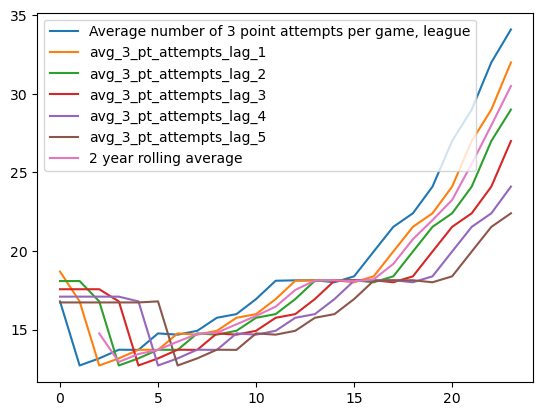

In [84]:
avg_3_pt_attempts.plot()

Here it is visible that the data is not stationary and requires differentiation.

Text(0.5, 1.0, '2nd Order Differencing')

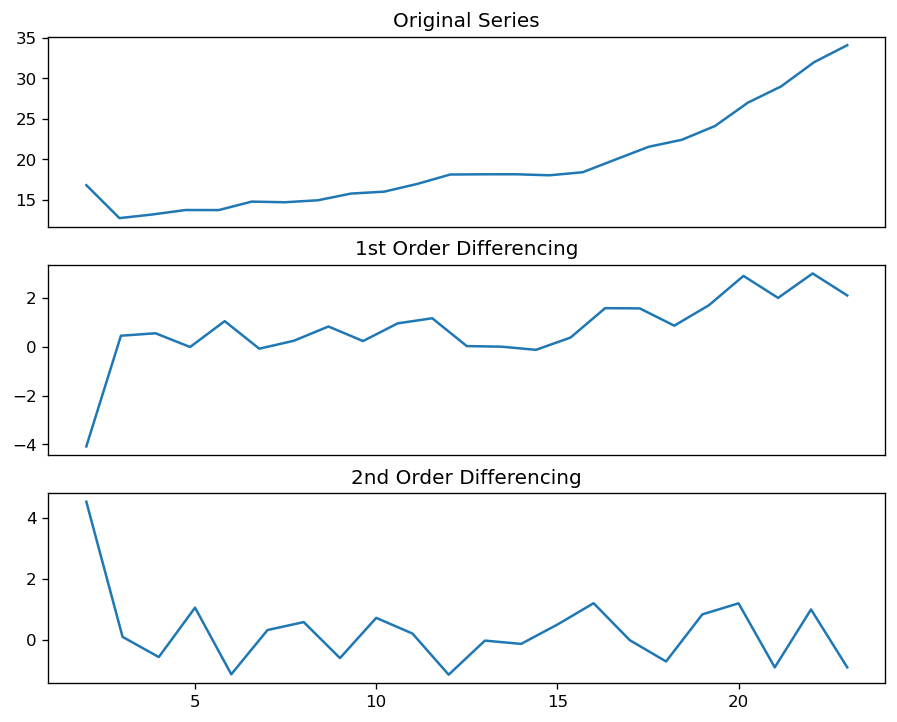

In [85]:
#Finding the value of the d parameter
plt.rcParams.update({'figure.figsize':(9,7), 'figure.dpi':120})

#Original series
fig, (ax1, ax2, ax3) = plt.subplots(3)
ax1.plot(avg_3_pt_attempts['Average number of 3 point attempts per game, league'])
ax1.set_title(('Original Series'))
ax1.axes.xaxis.set_visible(False)

#1st differencing
ax2.plot(avg_3_pt_attempts['Average number of 3 point attempts per game, league'].diff())
ax2.set_title('1st Order Differencing')
ax2.axes.xaxis.set_visible(False)

#2nd differencing
ax3.plot(avg_3_pt_attempts['Average number of 3 point attempts per game, league'].diff().diff())
ax3.set_title('2nd Order Differencing')

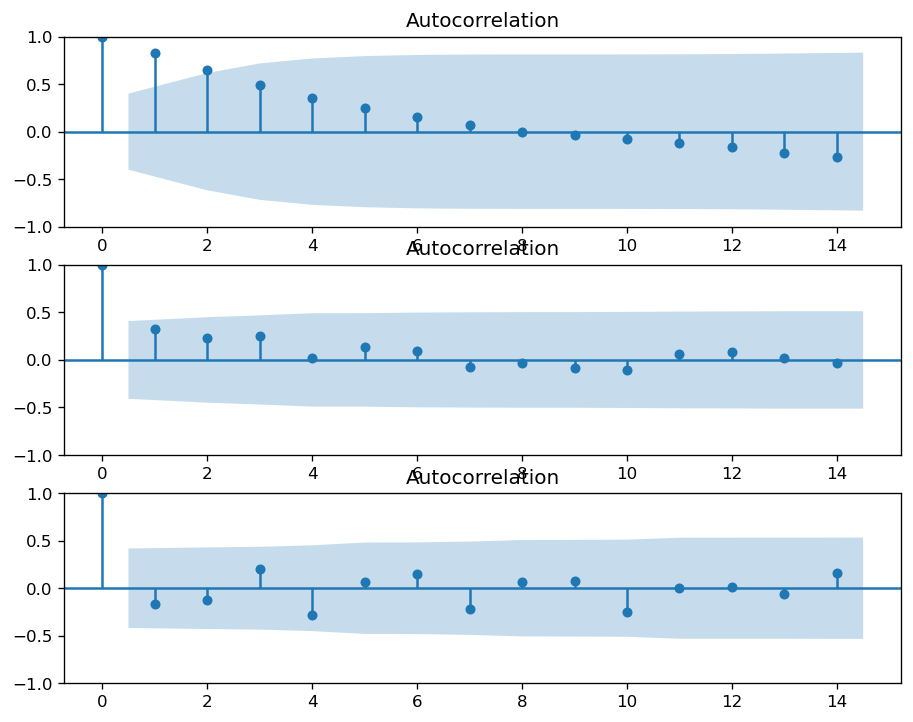

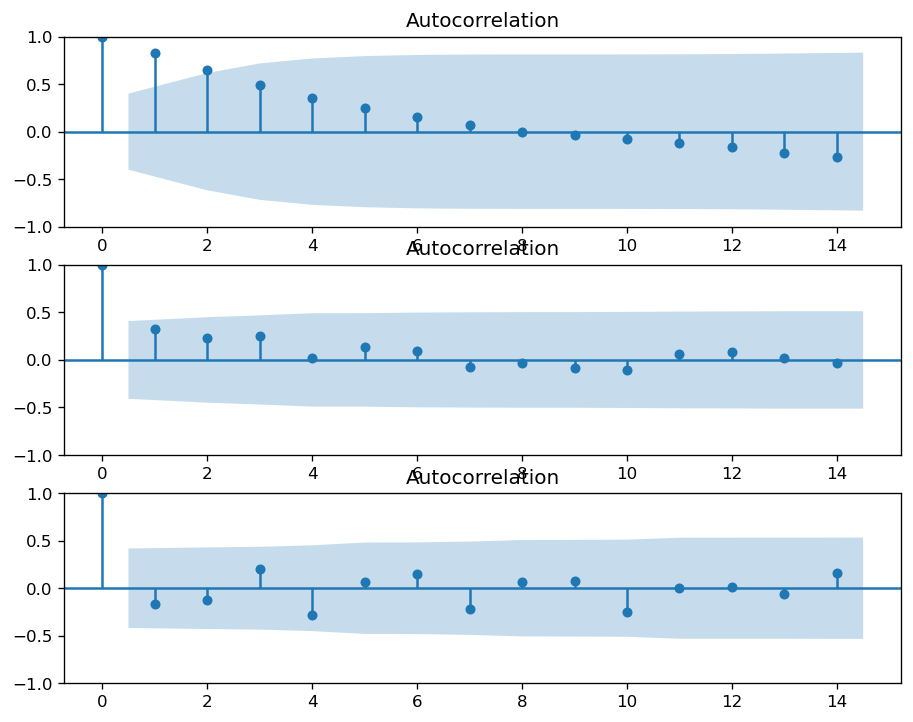

In [86]:
#autocorrelation plot
from statsmodels.graphics.tsaplots import plot_acf
fig, (ax1, ax2, ax3) = plt.subplots(3)
plot_acf(avg_3_pt_attempts['Average number of 3 point attempts per game, league'], ax = ax1)
plot_acf(avg_3_pt_attempts['Average number of 3 point attempts per game, league'].diff().dropna(), ax = ax2)
plot_acf(avg_3_pt_attempts['Average number of 3 point attempts per game, league'].diff().diff().dropna(), ax=ax3)

d=2

Finding the value of the p parameter

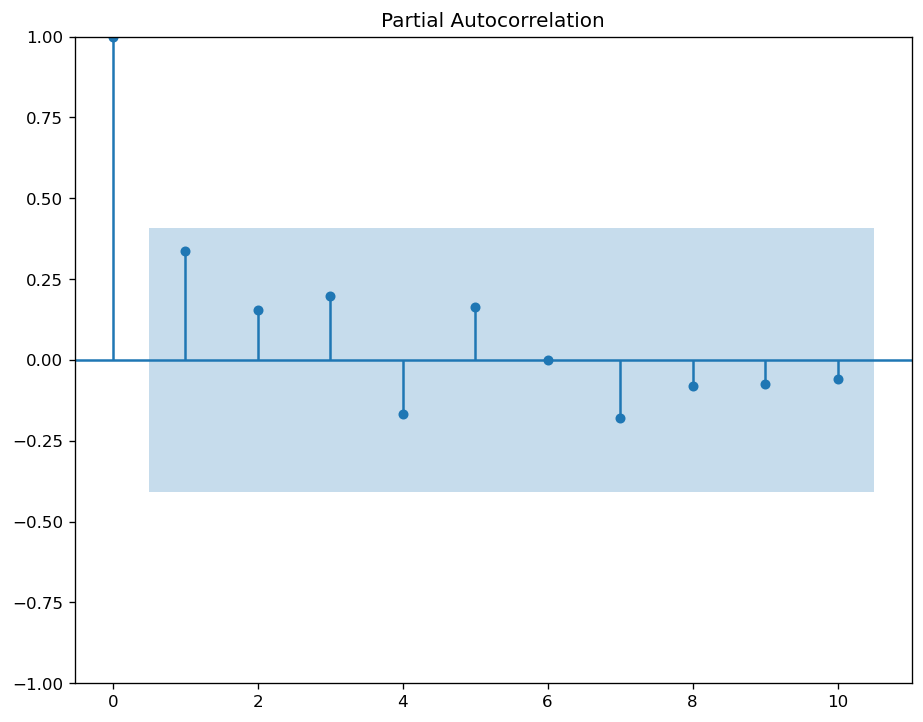

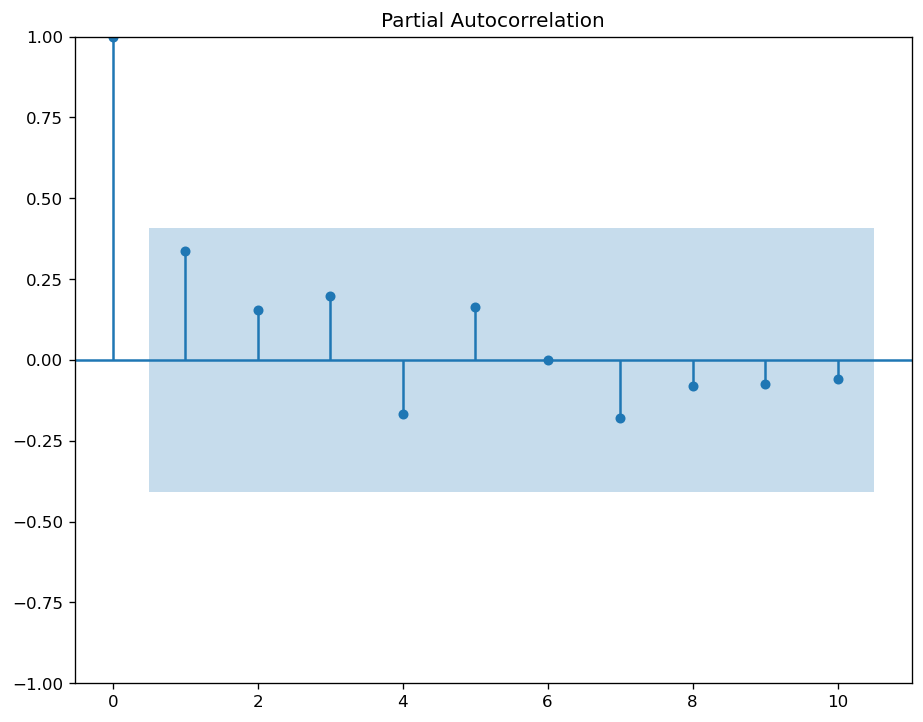

In [87]:
from statsmodels.graphics.tsaplots import plot_pacf
plot_pacf(avg_3_pt_attempts['Average number of 3 point attempts per game, league'].diff().dropna(), lags=10)

p=0

Finding the value of the q parameter

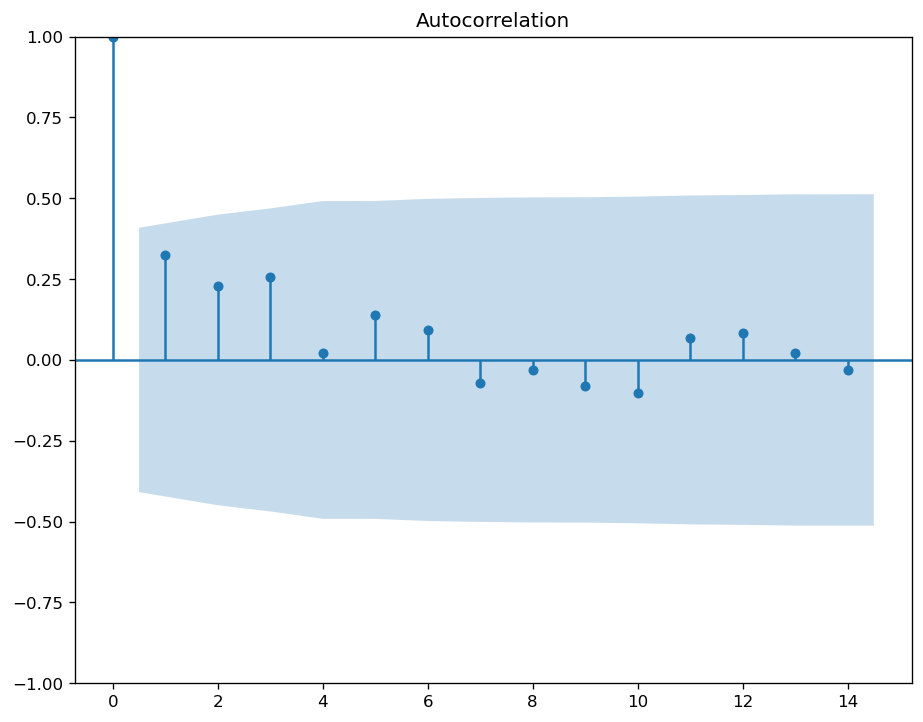

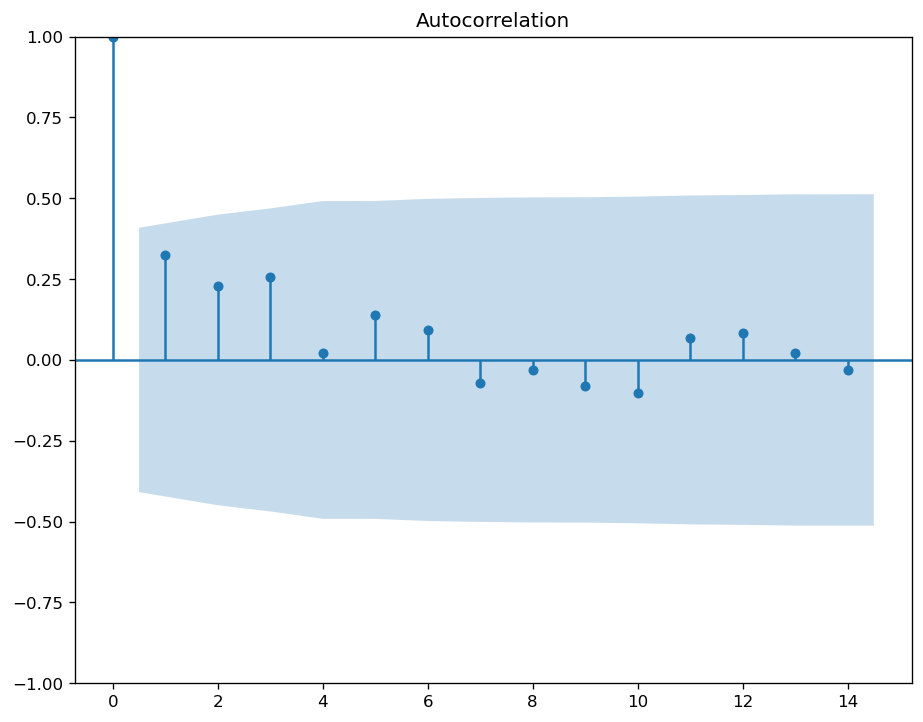

In [88]:
plot_acf(avg_3_pt_attempts['Average number of 3 point attempts per game, league'].diff().dropna())

q=0

In [89]:
# fit model
model_2 = sm.tsa.ARIMA(train_y, order=(2,0,0))
model_fit_2 = model_2.fit()

In [90]:
pred_y_2 = model_fit_2.predict(start = 19, end = 23, dynamic= True)

C:\Users\19713\OneDrive\Documents\lib\site-packages\statsmodels\tsa\statespace\kalman_filter.py:2290: ValueWarning: Dynamic prediction specified to begin during out-of-sample forecasting period, and so has no effect.
  warn('Dynamic prediction specified to begin during'


In [91]:
print(f'The mean absolute percentage error is: {mean_absolute_percentage_error(test_y, pred_y_2)}')
print(f'The accuracy of the ARIMA model is: {1 - mean_absolute_percentage_error(test_y, pred_y_2)}')

The mean absolute percentage error is: 0.3151038048877791
The accuracy of the ARIMA model is: 0.6848961951122209


In [92]:
model_fit.params

ar.L1     0.820750
ar.L2    -0.490427
ar.L3     0.508004
ar.L4    -0.792044
ar.L5     0.589314
sigma2    0.873269
dtype: float64

KeyError: 'The `start` argument could not be matched to a location related to the index of the data.'

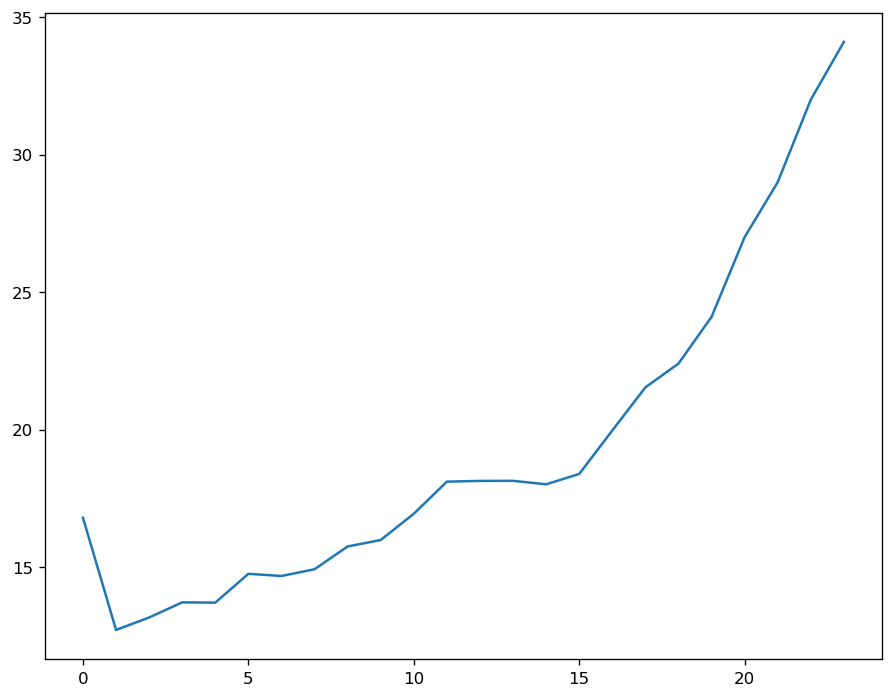

In [93]:
from statsmodels.graphics.tsaplots import plot_predict
fig, ax = plt.subplots()
avg_3_pt_attempts['Average number of 3 point attempts per game, league'].plot(ax = ax)
plot_predict(model_fit, start = '1996-97', end = '2019-20', ax = ax)
plt.show()

In [ ]:
league_avg = pd.DataFrame(avg_3_pt_attempts['Average number of 3 point attempts per game, league'])
league_avg.set_index(Season, inplace = True)

In [ ]:
league_avg

In [ ]:

conda install -c conda-forge pmdarima

In [ ]:
import pmdarima as pm

In [ ]:
Arima_model=pm.auto_arima(train_y, start_p=0, start_q=0, max_p=10, max_q=10, start_P=0, start_Q=0, max_P=10, max_Q=10, m=7, stepwise=True, seasonal=True, information_criterion='aic', trace=True, d=1, D=1, error_action='warn', suppress_warnings=True, random_state = 20, n_fits=30)